# Customer Default Payment Prediction Model
### -Data Magician Team-
Dataset : datatrain from (https://www.kaggle.com/datasets/reverie5/av-janata-hack-payment-default-prediction)

## Data Import
Dataset yang akan digunakan merupakan dataset dari kaggle yaitu data train Payment Default Prediction Data.
Berikut merupakan penjelasan dari kolom-kolom pada dataset

* ID : Unique ID of each client <br>
* LIMIT_BAL : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit<br>
* SEX : Gender (1=male, 2=female)<br>
* EDUCATION : 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
* MARRIAGE : Marital status (1=married, 2=single, 3=divorced)<br>
* AGE : Age of the client<br>
* PAY_0 - PAY_6 : Repayment status in April until September(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
* BILL_AMT 1 - BILL_AMT2 : Amount of bill statement in each month, 2005 (NT dollar)<br>
* PAY_AMT1 - PAY_6 : Amount of previous payment in each month, 2005 (NT dollar)<br>
* default_payment_next_month  : Target Variable: Default payment (1=yes, 0=no)

In [1]:
# Library import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print('version numpy :',np.__version__) 
print('version pandas :',pd.__version__)

version numpy : 1.21.5
version pandas : 1.4.4


In [2]:
# DATA IMPORT

dftrain = pd.read_csv('train_20D8GL3.csv')
dftrain.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


## Data Preprocessing

Dapat dilihat bahwa field ID, SEX, EDUCATION, MARRIAGE, dan PAY_0 hingga PAY_6 memiliki tipe data integer. Walaupun data tersebut berisikan angka (numerik), tetapi jenis field tersebut merupakan data kategorikal yang seharusnya bertipe object. Sebaiknya tipe data tersebut diubah agar tidak terjadi kesalahan processing.

Kolom PAY_0 tidak sesuai namanya, seharusnya PAY_1. Kemudian dari kolom PAY_1 hingga PAY_6 kita rubah ke bulan nya

In [4]:
# Rename PAY_0 column
dftrain.rename(columns={'PAY_0': 'PAY_Sep',
                        'PAY_2' : 'PAY_Aug',
                        'PAY_3' : 'PAY_Jul',
                        'PAY_4' : 'PAY_Jun',
                        'PAY_5' : 'PAY_May',
                        'PAY_6' : 'PAY_Apr',
                        'BILL_AMT1' : 'BILL_AMT_Sep',
                        'BILL_AMT2' : 'BILL_AMT_Aug',
                        'BILL_AMT3' : 'BILL_AMT_Jul',
                        'BILL_AMT4' : 'BILL_AMT_Jun',
                        'BILL_AMT5' : 'BILL_AMT_May',
                        'BILL_AMT6' : 'BILL_AMT_Apr',
                        'PAY_AMT1' : 'PAY_AMT_Sep',
                        'PAY_AMT2' : 'PAY_AMT_Aug',
                        'PAY_AMT3' : 'PAY_AMT_Jul',
                        'PAY_AMT4' : 'PAY_AMT_Jun',
                        'PAY_AMT5' : 'PAY_AMT_May',
                        'PAY_AMT6' : 'PAY_AMT_Apr'}, inplace=True)

In [53]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_Sep                     21000 non-null  int64
 7   PAY_Aug                     21000 non-null  int64
 8   PAY_Jul                     21000 non-null  int64
 9   PAY_Jun                     21000 non-null  int64
 10  PAY_May                     21000 non-null  int64
 11  PAY_Apr                     21000 non-null  int64
 12  BILL_AMT_Sep                21000 non-null  int64
 13  BILL_AMT_Aug                21000 non-null  int64
 14  BILL_A

In [5]:
# Transforming data type

for i in ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun', 'PAY_May', 'PAY_Apr']:
  dftrain[i] = dftrain[i].astype('object')

In [55]:
dftrain[['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun', 'PAY_May', 'PAY_Apr']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         21000 non-null  object
 1   SEX        21000 non-null  object
 2   EDUCATION  21000 non-null  object
 3   MARRIAGE   21000 non-null  object
 4   PAY_Sep    21000 non-null  object
 5   PAY_Aug    21000 non-null  object
 6   PAY_Jul    21000 non-null  object
 7   PAY_Jun    21000 non-null  object
 8   PAY_May    21000 non-null  object
 9   PAY_Apr    21000 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


Kolom ID, SEX, EDUCATION, MARRIAGE, dan PAY_Apr hingga PAY_Sep telah disesuaikan data typenya.

### Cek Missing & Duplicate Data

**Apakah terdapat data duplikasi dan missing data?**

In [7]:
# Check the missing data
if dftrain.isnull().sum().sum() == 0: print('Tidak ada missing data')
else : print(f'Terdapat data duplikat sebesar{dftrain.isnull().sum()}')

Tidak ada missing data


In [8]:
# Check the duplicated data
if dftrain.duplicated().sum() == 0: print('Tidak ada data duplikat')
else : print(f'Terdapat data duplikat sebesar{dftrain.duplicated().sum()}')

Tidak ada data duplikat


### Descriptive Summary

**Bagaimana deskripsi statistik singkat dari dataset?**

In [9]:
# Descriptive Statistics
numerical_vars = ['LIMIT_BAL', 'AGE']
dftrain[numerical_vars].describe()

,LIMIT_BAL,AGE
count,21000.000000,21000.000000
mean,167214.746667,35.461619
std,128965.188482,9.206628
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,75.000000


Jumlah limit kredit yang diberikan pada nasabah (LIMIT_BAL), dan umur nasabah memiliki nilai mean yang lebih besar daripada median dari keseluruhan data, hal ini mengindikasikan bahwa data berdistribusi *positively skewed*. Selanjutnya perlu dilihat distribusi data dengan melihat visualisasinya.

In [60]:
bill_vars = ['BILL_AMT_Sep', 'BILL_AMT_Aug', 'BILL_AMT_Jul', 'BILL_AMT_Jun', 'BILL_AMT_May', 'BILL_AMT_Apr']
dftrain[bill_vars].describe()

,BILL_AMT_Sep,BILL_AMT_Aug,BILL_AMT_Jul,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Apr
count,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000
mean,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000
std,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234
min,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000
25%,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000
50%,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000
75%,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000
max,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000


Terdapat nilai tagihan nasabah yang **bernilai negatif**, untuk selanjutnya perlu dicek apakah data perlu dilakukan penanganan khusus.

In [61]:
# Check if feature's distribution is positively skewed 
for i in ['BILL_AMT_Sep', 'BILL_AMT_Aug', 'BILL_AMT_Jul', 'BILL_AMT_Jun', 'BILL_AMT_May', 'BILL_AMT_Apr']:
  if dftrain[i].mean() > dftrain[i].median(): print(f'{i} memiliki kemungkinan berdistribusi positively skewed')
  elif dftrain[i].mean() < dftrain[i].median(): print(f'{i} memiliki kemungkinan berdistribusi negatively skewed')
  else : print('Cek ulang data')

BILL_AMT_Sep memiliki kemungkinan berdistribusi positively skewed
BILL_AMT_Aug memiliki kemungkinan berdistribusi positively skewed
BILL_AMT_Jul memiliki kemungkinan berdistribusi positively skewed
BILL_AMT_Jun memiliki kemungkinan berdistribusi positively skewed
BILL_AMT_May memiliki kemungkinan berdistribusi positively skewed
BILL_AMT_Apr memiliki kemungkinan berdistribusi positively skewed


Diketahui jumlah tagihan nasabah pada bulan April hingga September memiliki nilai mean lebih besar dibandingkan median dari keseluruhan data, sehingga memiliki kemungkinan untuk berdistribusi *positively skewed*.

In [62]:
pay_vars = ['PAY_AMT_Sep', 'PAY_AMT_Aug', 'PAY_AMT_Jul', 'PAY_AMT_Jun', 'PAY_AMT_May', 'PAY_AMT_Apr']
dftrain[pay_vars].describe()

,PAY_AMT_Sep,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,PAY_AMT_Apr
count,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


In [63]:
# Check if feature's distribution is positively skewed 
for i in ['PAY_AMT_Sep', 'PAY_AMT_Aug', 'PAY_AMT_Jul', 'PAY_AMT_Jun', 'PAY_AMT_May', 'PAY_AMT_Apr']:
  if dftrain[i].mean() > dftrain[i].median(): print(f'{i} memiliki kemungkinan berdistribusi positively skewed')
  elif dftrain[i].mean() < dftrain[i].median(): print(f'{i} memiliki kemungkinan berdistribusi negatively skewed')
  else : print('Cek ulang data')

PAY_AMT_Sep memiliki kemungkinan berdistribusi positively skewed
PAY_AMT_Aug memiliki kemungkinan berdistribusi positively skewed
PAY_AMT_Jul memiliki kemungkinan berdistribusi positively skewed
PAY_AMT_Jun memiliki kemungkinan berdistribusi positively skewed
PAY_AMT_May memiliki kemungkinan berdistribusi positively skewed
PAY_AMT_Apr memiliki kemungkinan berdistribusi positively skewed


Diketahui jumlah pembayaran nasabah pada bulan April hingga September memiliki nilai mean lebih besar dibandingkan median dari keseluruhan data, sehingga memiliki kemungkinan untuk berdistribusi positively skewed.

## Univariate Analysis

**Berapa banyak nasabah yang berada pada data train?**

In [64]:
print('Terdapat sebanyak ',dftrain['ID'].nunique(), ' nasabah pada data train')

Terdapat sebanyak  21000  nasabah pada data train


### Persentase User Payment Default

**Berapa persentase nasabah yang mengalami kegagalan bayar pada bulan Oktober?**

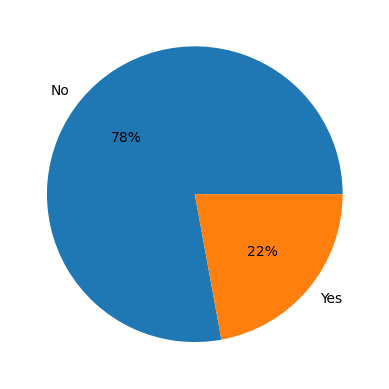

In [15]:
default_payment_next_month_count = dftrain.replace({1:'Yes', 0:'No'})
default_payment_next_month_count = default_payment_next_month_count.groupby('default_payment_next_month').agg(count = ('ID', 'nunique')).reset_index()
plt.pie(default_payment_next_month_count['count'], labels = default_payment_next_month_count['default_payment_next_month'], autopct='%.0f%%')
plt.show()

Terdapat 22% nasabah yang mengalami payment default pada bulan Oktober.

### Distribusi Gender

**Bagaimana distribusi gender pada nasabah?**

In [16]:
datacopy = dftrain.copy()
datacopy['SEX'] = datacopy['SEX'].replace({1:'male', 2:'female'})
datacopy['default_payment_next_month'] = datacopy['default_payment_next_month'].replace({1:'Yes', 0:'No'})
sex_count = datacopy.groupby(['SEX', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
sex_count['default rate by gender']= ['-', sex_count['count'][1]/(sex_count['count'][0]+sex_count['count'][1]), '-', sex_count['count'][3]/(sex_count['count'][2]+sex_count['count'][3])]
sex_count

,SEX,default_payment_next_month,count,default rate by gender
0,female,No,10097,-
1,female,Yes,2662,0.208637
2,male,No,6258,-
3,male,Yes,1983,0.240626


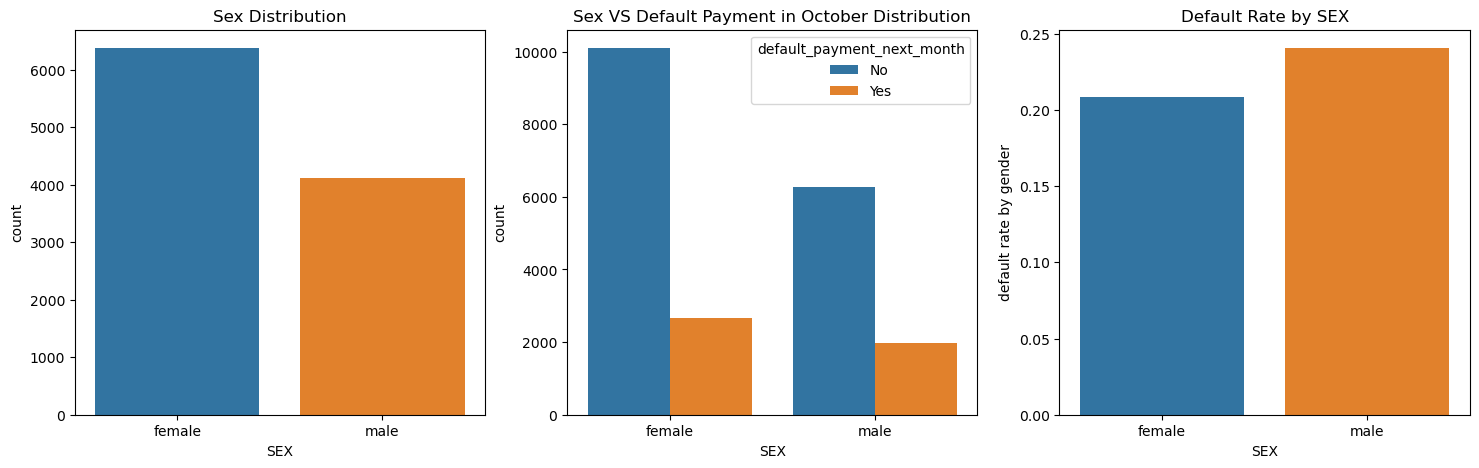

In [17]:
sex_plot, axes = plt.subplots(ncols=3, figsize=(18, 5))

sns.barplot(x = 'SEX', y = 'count', data = sex_count, ci = False, ax = axes[0])
axes[0].set_title('Sex Distribution')

sns.barplot(x = 'SEX', y = 'count', hue = 'default_payment_next_month', data = sex_count, ax = axes[1])
axes[1].set_title('Sex VS Default Payment in October Distribution')

sns.barplot(x = sex_count['SEX'], y = sex_count['default rate by gender'][[1,3]], ax = axes[2])
axes[2].set_title('Default Rate by SEX')

sex_plot.subplots_adjust(wspace=0.2)

Terdapat lebih banyak nasabah perempuan dibandingkan dengan nasabah lak-laki. Baik nasabah perempuan maupun laki laki, lebih banyak yang berhasil bayar pada bulan Oktober. 

Data menunjukkan bahwa default rate nasabah perempuan lebih kecil dibanding dengan default rate nasabah laki-laki.

### Distribusi Background Pendidikan

**Bagaimana distribusi pendidikan nasabah?**

In [21]:
datacopy = dftrain.copy()
datacopy['EDUCATION'] = datacopy['EDUCATION'].replace({0 : 'elementary school', 
                                                       1 : 'graduate school', #graduate school didefinisikan user dengan background pendidikan S2 (Magister)
                                                       2 : 'university', 
                                                       3 : 'high school', 
                                                       4 : 'others', #others difenisikan user dengan background pendidikan lebih tinggi dari Magister
                                                       5 : 'unknown', 
                                                       6 : 'unknown'})
datacopy['default_payment_next_month'] = datacopy['default_payment_next_month'].replace({0 : 'no',
                                                                                         1 : 'yes'})
                                                       
edu_count = datacopy.groupby(['EDUCATION', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
edu_count.sort_values(['default_payment_next_month', 'count'], ascending = False)

,EDUCATION,default_payment_next_month,count
8,university,yes,2345
2,graduate school,yes,1433
4,high school,yes,849
10,unknown,yes,14
6,others,yes,4
7,university,no,7444
1,graduate school,no,5982
3,high school,no,2618
9,unknown,no,220
5,others,no,81


<AxesSubplot:title={'center':'Education Distribution'}, xlabel='EDUCATION', ylabel='count'>

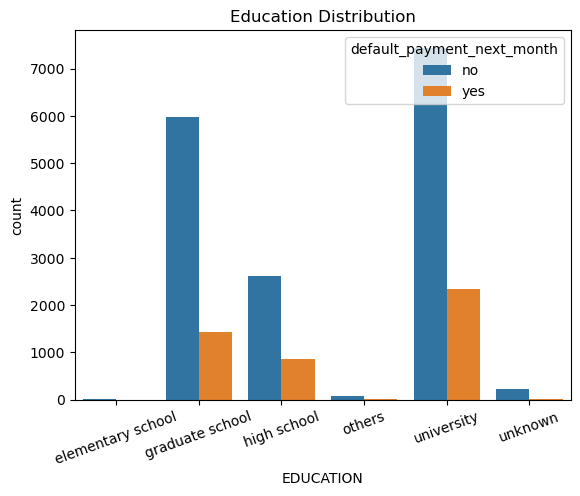

In [22]:
edu_plot = sns.barplot(x = 'EDUCATION', y = 'count', ci = False, data = edu_count, hue='default_payment_next_month')
edu_plot.set_title('Education Distribution')
edu_plot.set_xticklabels(edu_plot.get_xticklabels(), rotation=20)
edu_plot

Nasabah paling banyak merupakan lulusan universitas sebesar 46%, dan diikuti oleh lulusan high school dengan sebesar 35%.

Dalam dataset ini masih ada data dengan nilai yang tidak sesuai, terdapat data yang bernilai 0, dimana nilai tersebut tidak terdefinisikan sebagai suatu kategori pendidikan nasabah. Perlu dilakukan follow up apakah nilai 0 ini merupakan data salah, atau memiliki artian lain.

Terdapat dua kategori yang memiliki arti '*unknown*' yaitu data bernilai 5 dan 6, sehingga perlu dipastikan kembali apakah dua kategori tersebut memiliki artian sama atau berbeda.

### Distribusi Maritas Status

**Bagaimana distribusi dari marriage status nasabah?**

In [23]:
datacopy['MARRIAGE']= datacopy['MARRIAGE'].replace({1 : 'married', 
                                                    2 : 'single', 
                                                    3 : 'divorced',
                                                    0 : 'unknown'})
marriage_count = datacopy.groupby(['MARRIAGE', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
x = marriage_count['count']
marriage_count['def rate by marriage'] = ['-', x[1]/(x[0]+x[1]), '-', x[3]/(x[2]+x[3]), '-', x[5]/(x[4]+x[5]), '-', x[7]/(x[6]+x[7])]
marriage_count

,MARRIAGE,default_payment_next_month,count,def rate by marriage
0,divorced,no,156,-
1,divorced,yes,63,0.287671
2,married,no,7343,-
3,married,yes,2218,0.231984
4,single,no,8822,-
5,single,yes,2362,0.211195
6,unknown,no,34,-
7,unknown,yes,2,0.055556


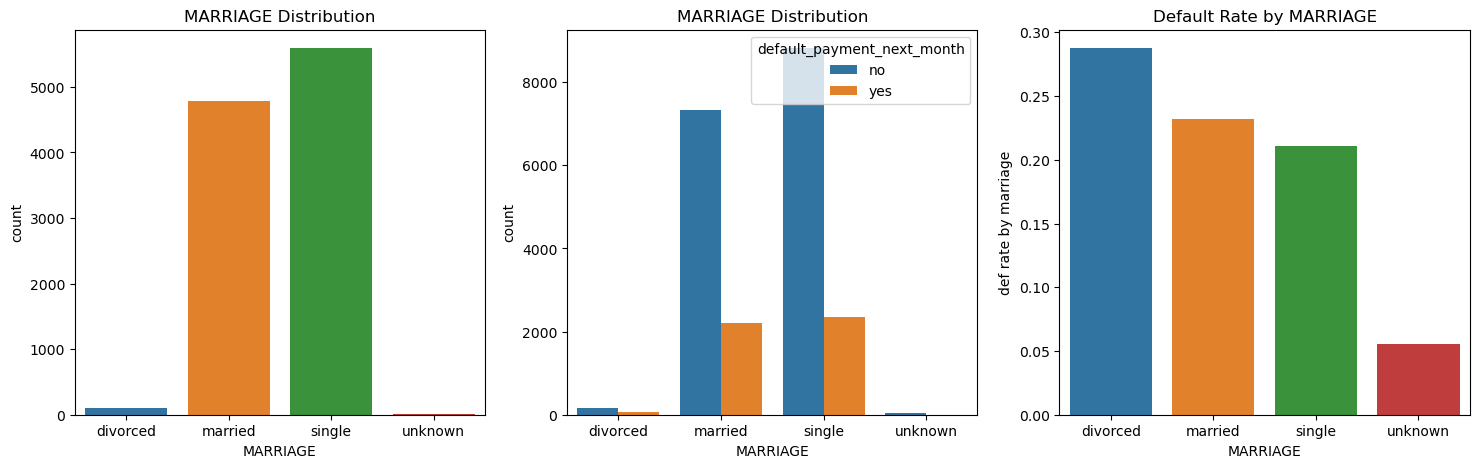

In [24]:
marriage_plot, axes = plt.subplots(ncols=3, figsize=(18, 5))

sns.barplot(x = 'MARRIAGE', y = 'count', data = marriage_count, ci = False, ax = axes[0])
axes[0].set_title('MARRIAGE Distribution')

sns.barplot(x = 'MARRIAGE', y = 'count', hue = 'default_payment_next_month', data = marriage_count, ax = axes[1])
axes[1].set_title('MARRIAGE Distribution')

sns.barplot(x = marriage_count['MARRIAGE'], y = marriage_count['def rate by marriage'][[1,3,5,7]], ax = axes[2])
axes[2].set_title('Default Rate by MARRIAGE')

marriage_plot.subplots_adjust(wspace=0.2)

Diketahui bahwa masih terdapat data dengan nilai yang tidak sesuai dengan kategori yang telah ditentukan, yaitu data yang bernilai 0. Sehingga perlu kembali dilakukan follow up apakah nilai tersebut ada karena kesalahan input atau memiliki artian lain.

Dari dataset, diketahui bahwa nasabah paling banyak berstatus single, dan nasabah dengan default rate paling tinggi adalah nasabah yang telah bercerai.

### Distribusi Umur

**Bagaimana distribusi umur nasabah?**

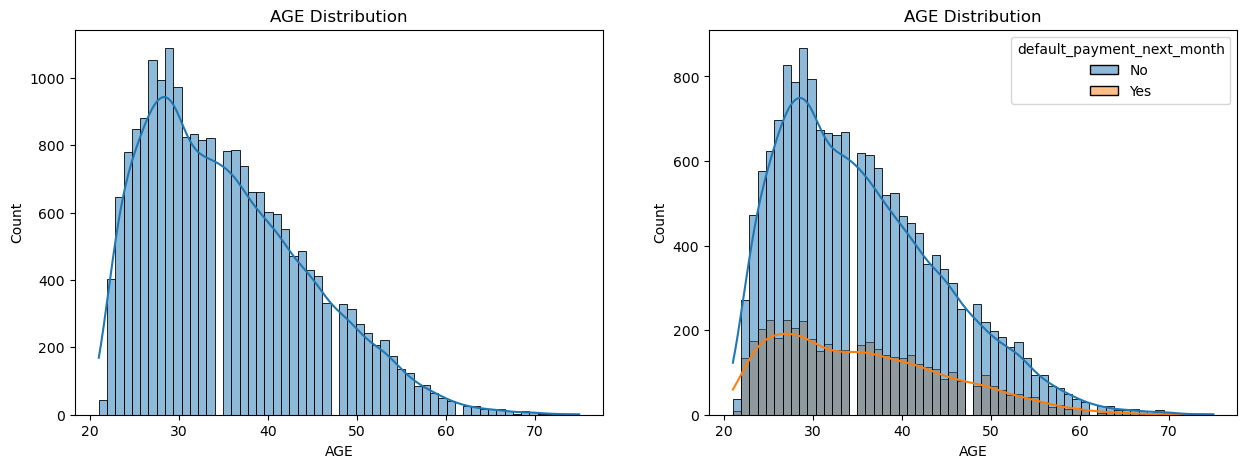

In [22]:
age_plot, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.histplot(datacopy['AGE'], kde = True, ax = axs[0])
axs[0].set_title('AGE Distribution')

sns.histplot(datacopy, x='AGE', hue='default_payment_next_month', kde = True, ax = axs[1])
axs[1].set_title('AGE Distribution')

age_plot.subplots_adjust(wspace=0.2)


Untuk keseluruhan nasabah berdistribusi positively skewed, dan paling banyak berada pada range antara 25-30 tahun. Nasabah yang memiliki potensi untuk gagal bayar berada pada range 25-30.

Untuk mempermudah interpretasi data, nasabah akan dikelompokkan kembali sesuai range usia.

In [27]:
list1 = []
for index, row in dftrain.iterrows():
  if row['AGE'] < 25 :
    list1.append('Young (<25)')
  elif row['AGE'] >= 25 and row['AGE'] < 40:
    list1.append('Adult (25-39)')
  elif row['AGE'] >= 40 and row['AGE'] < 60:
    list1.append('Middle Aged (40-59)')
  else :
    list1.append('Old (>60)')

datacopy['SEGMENT'] = list1
age_segmentation = datacopy.groupby(['SEGMENT', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
age_segmentation

,SEGMENT,default_payment_next_month,count
0,Adult (25-39),no,10125
1,Adult (25-39),yes,2628
2,Middle Aged (40-59),no,4694
3,Middle Aged (40-59),yes,1440
4,Old (>60),no,179
5,Old (>60),yes,60
6,Young (<25),no,1357
7,Young (<25),yes,517


Text(0.5, 1.0, 'Age Segmentation Distribution')

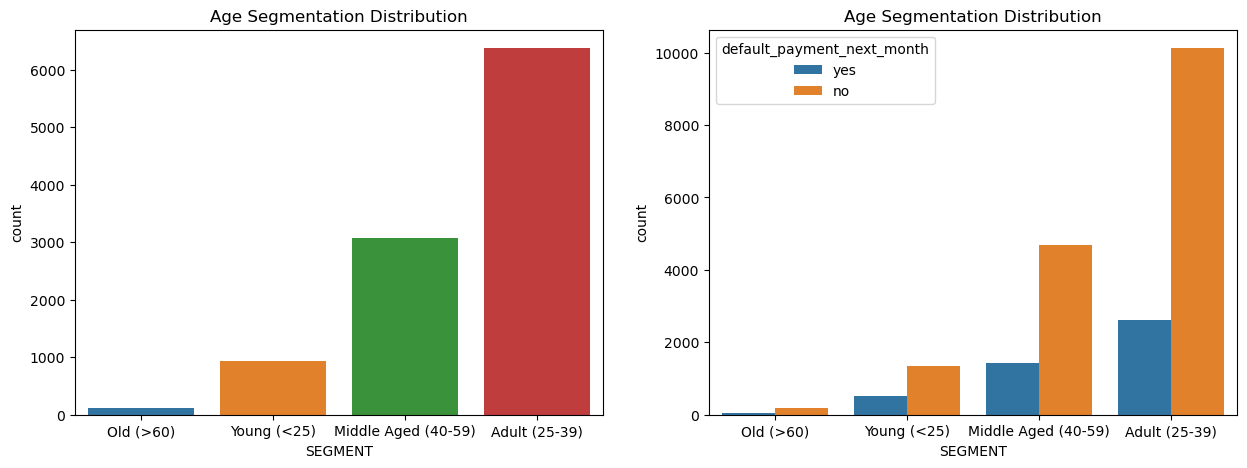

In [28]:
age_segmentation_plot, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.barplot(x = 'SEGMENT', y = 'count', data = age_segmentation.sort_values('count'), ci = False, ax = axs[0])
axs[0].set_title('Age Segmentation Distribution')

sns.barplot(x = 'SEGMENT', y = 'count', data = age_segmentation.sort_values('count'), hue = 'default_payment_next_month', ax = axs[1])
axs[1].set_title('Age Segmentation Distribution')

Nasabah paling banyak berada pada segmen usia Dewasa (25-39 tahun), dan segment usia adult ini juga memiliki nasabah yang gagal bayar pada bulan Oktober paling banyak dibandingkan dengan segmen usia lainnya.

### Distribusi Limit Credit Card

**Bagaimana distribusi dari limit kartu kredit nasabah?**

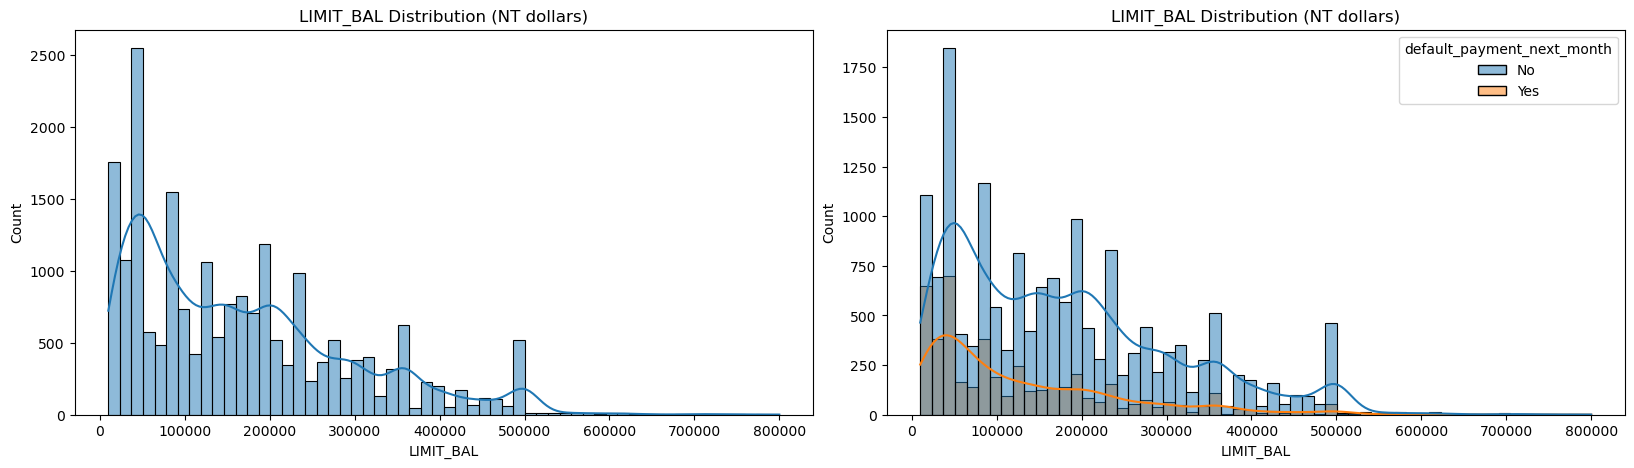

In [25]:
limit_bal_plot, axs = plt.subplots(ncols=2, figsize=(20, 5))

sns.histplot(datacopy['LIMIT_BAL'], kde = True, ax = axs[0])
axs[0].set_title('LIMIT_BAL Distribution (NT dollars)')

sns.histplot(datacopy, x = 'LIMIT_BAL',hue='default_payment_next_month', kde = True, ax = axs[1])
axs[1].set_title('LIMIT_BAL Distribution (NT dollars)')

limit_bal_plot.subplots_adjust(wspace=0.1)

Feature limit kartu kredit nasabah memiliki distribusi positively skewed. Secara keseluruhan nasabah memiliki limit kartu kredit di bawah NTD 100.000. Begitu juga dengan nasabah yang mengalami gagal bayar pada bulan Oktober banyak yang berada pada limit di bawah NTD 100.000 

### Distribusi Repayment Status

**Bagaimana distribusi dari Repayment status nasabah tiap bulannya?**

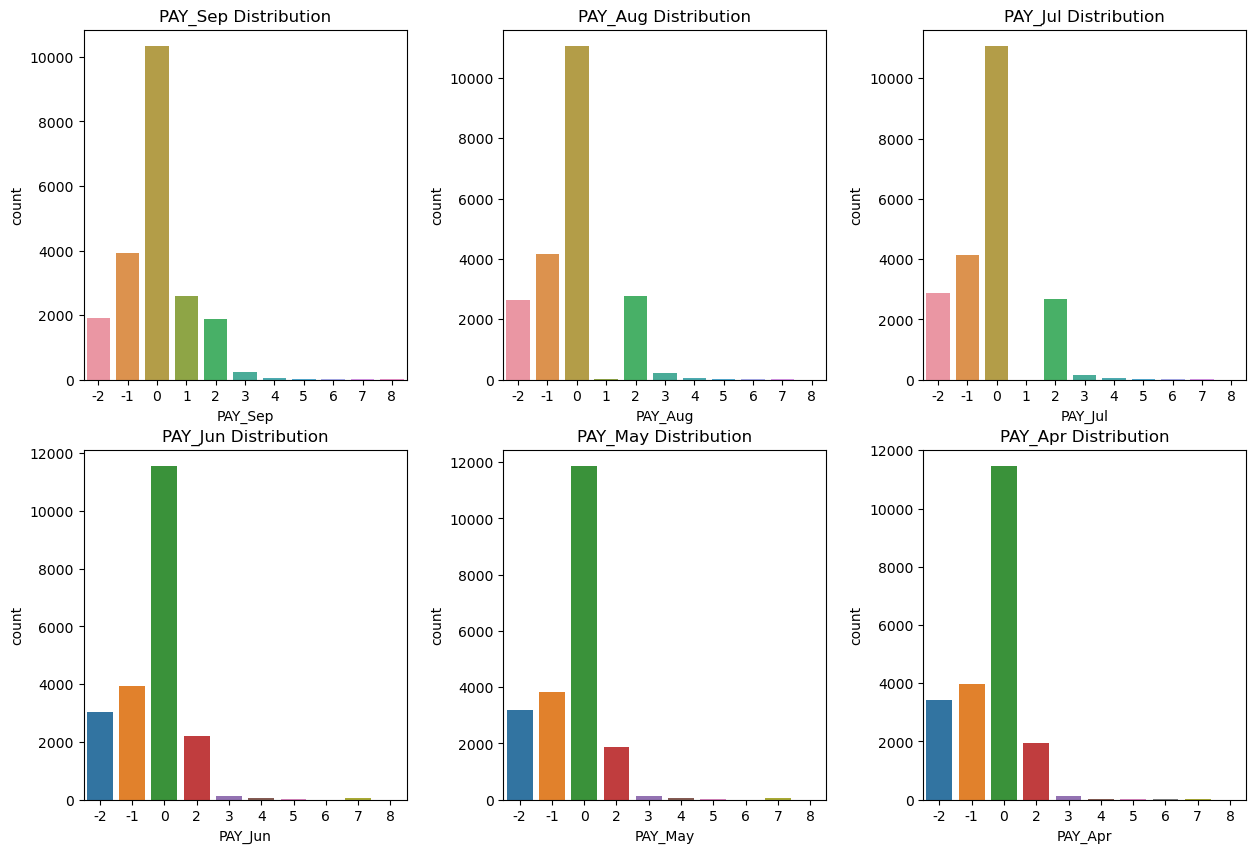

In [42]:
repayment_status_plot, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 10))

repayment_status_1_count = datacopy.groupby('PAY_Sep').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_Sep', y = 'count', data = repayment_status_1_count, ax = axes[0,0])
axes[0,0].set_title('PAY_Sep Distribution')

repayment_status_2_count = datacopy.groupby('PAY_Aug').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_Aug', y = 'count', data = repayment_status_2_count, ax = axes[0,1])
axes[0,1].set_title('PAY_Aug Distribution')

repayment_status_3_count = datacopy.groupby('PAY_Jul').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_Jul', y = 'count', data = repayment_status_3_count, ax = axes[0,2])
axes[0,2].set_title('PAY_Jul Distribution')

repayment_status_4_count = datacopy.groupby('PAY_Jun').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_Jun', y = 'count', data = repayment_status_4_count, ax = axes[1,0])
axes[1,0].set_title('PAY_Jun Distribution')

repayment_status_5_count = datacopy.groupby('PAY_May').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_May', y = 'count', data = repayment_status_5_count, ax = axes[1,1])
axes[1,1].set_title('PAY_May Distribution')

repayment_status_6_count = datacopy.groupby('PAY_Apr').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_Apr', y = 'count', data = repayment_status_6_count, ax = axes[1,2])
axes[1,2].set_title('PAY_Apr Distribution')

repayment_status_plot.subplots_adjust(wspace=0.3, hspace = 0.2)

Dari data payment tiap bulannya, kategori yang paling tinggi frekuensinya adalahh kategori 0, dan terdapat data dengan nilai -2. Padahal dalam deskripsi dataset ini tidak ada penjelasan terkait data dengan nilai 0 dan -2. Jadi perlu dilakukan lagi follow up apakah data dengan nilai 0 ini ada karena kesalahan input data atau ada artian lain.

Tetapi untuk tiap bulannya, nasabah yang melakukan pembayaran tepat waktu (kategori -1) masih lebih banyak dibandingkan dengan nasabah yang megalami telat bayar.

### Distribusi Tagihan Kredit

**Bagaimana distribusi tagihan/bill kartu kredit dari nasabah tiap bulannya?**

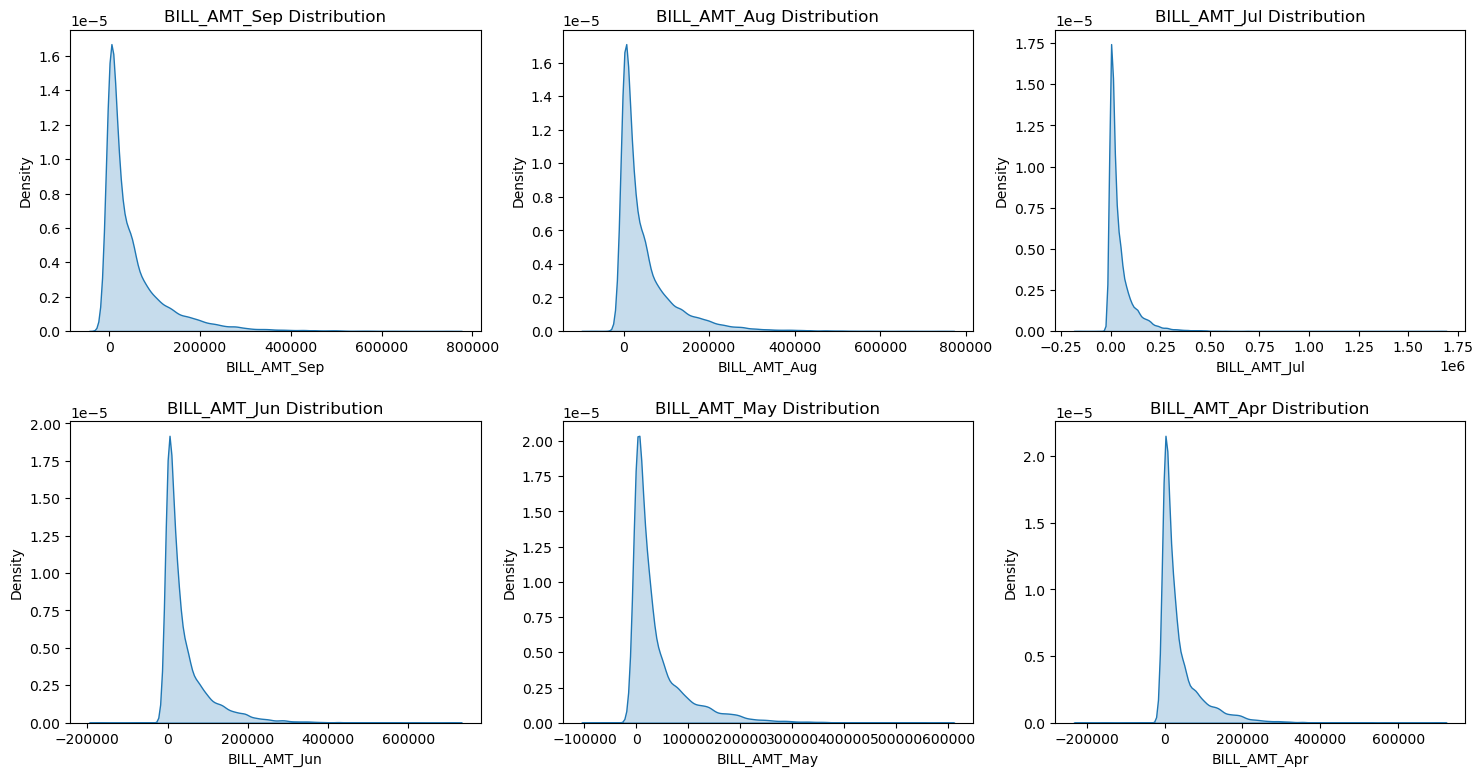

In [56]:
# BILL Distribution
bill_plot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.kdeplot(dftrain['BILL_AMT_Sep'], fill = True, ax = axs[0,0])
axs[0,0].set_title('BILL_AMT_Sep Distribution')
sns.kdeplot(dftrain['BILL_AMT_Aug'], fill = True, ax = axs[0,1])
axs[0,1].set_title('BILL_AMT_Aug Distribution')
sns.kdeplot(dftrain['BILL_AMT_Jul'], fill = True, ax = axs[0,2])
axs[0,2].set_title('BILL_AMT_Jul Distribution')
sns.kdeplot(dftrain['BILL_AMT_Jun'], fill = True, ax = axs[1,0])
axs[1,0].set_title('BILL_AMT_Jun Distribution')
sns.kdeplot(dftrain['BILL_AMT_May'], fill = True, ax = axs[1,1])
axs[1,1].set_title('BILL_AMT_May Distribution')
sns.kdeplot(dftrain['BILL_AMT_Apr'], fill = True, ax = axs[1,2])
axs[1,2].set_title('BILL_AMT_Apr Distribution')

bill_plot.subplots_adjust(hspace=0.3)

Tagihan kartu kredit nasabah tiap bulannya berdistribusi *positively skewed*, dan terdapat data yang bernilai negatif. Untuk selanjutnya perlu dilakukan follow up terkait nilai tagihan negatif tersebut, apakah terdapat kesalahan input data atau data tersebut memiliki artian lain.

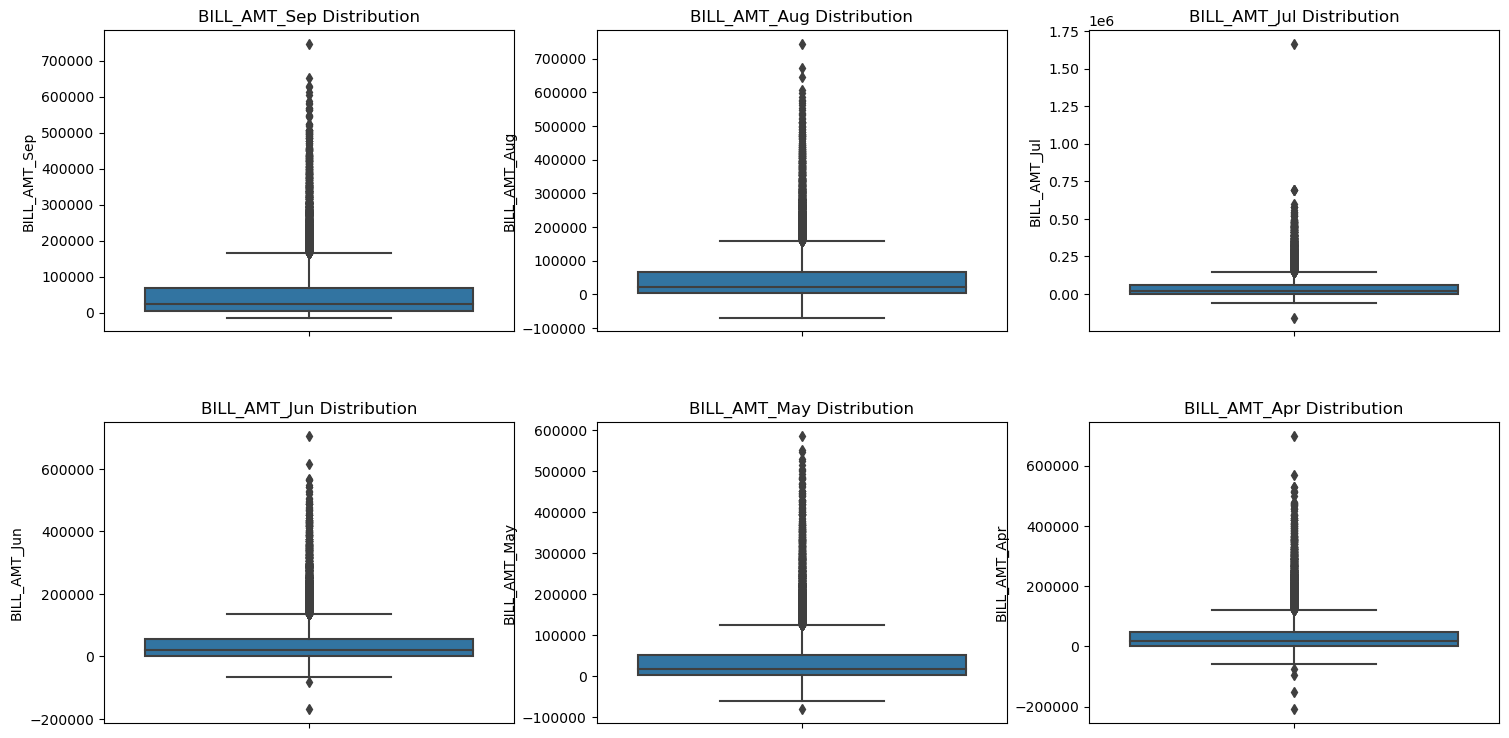

In [57]:
# BILL BOX PLOT
pay_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.boxplot(y = dftrain['BILL_AMT_Sep'], ax = axs[0,0])
axs[0,0].set_title('BILL_AMT_Sep Distribution')
sns.boxplot(y = dftrain['BILL_AMT_Aug'], ax = axs[0,1])
axs[0,1].set_title('BILL_AMT_Aug Distribution')
sns.boxplot(y = dftrain['BILL_AMT_Jul'], ax = axs[0,2])
axs[0,2].set_title('BILL_AMT_Jul Distribution')
sns.boxplot(y = dftrain['BILL_AMT_Jun'], ax = axs[1,0])
axs[1,0].set_title('BILL_AMT_Jun Distribution')
sns.boxplot(y = dftrain['BILL_AMT_May'], ax = axs[1,1])
axs[1,1].set_title('BILL_AMT_May Distribution')
sns.boxplot(y = dftrain['BILL_AMT_Apr'], ax = axs[1,2])
axs[1,2].set_title('BILL_AMT_Apr Distribution')

pay_boxplot.subplots_adjust(hspace=0.3)

Dari tagihan nasabah tiap bulannya, masih terdapat outlier ekstrim yang mungkin akan menurunkan performa model jika data digunakan sebagai data train dalam data modeling. Sehingga lebih baik jika outlier ini dihandle dengan melakukan penghapusan atau transformasi distribusi data menjadi distribusi yang mendekati normal.

### Distribusi Pembayaran

**Bagaimana distribusi pembayaran nasabah tiap bulannya?**

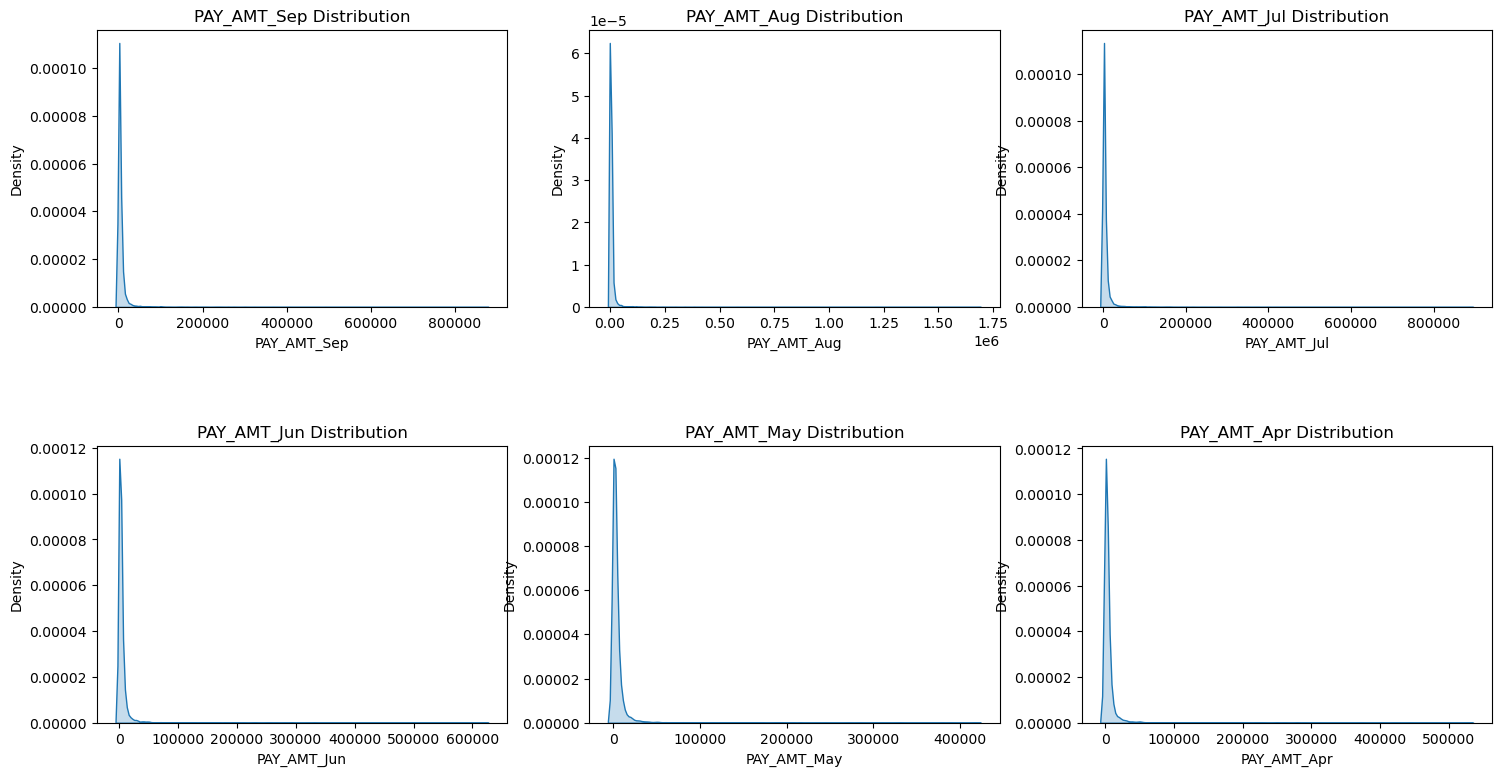

In [58]:
# PAY Distribution
pay_plot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.kdeplot(dftrain['PAY_AMT_Sep'], fill = True, ax = axs[0,0])
axs[0,0].set_title('PAY_AMT_Sep Distribution')
sns.kdeplot(dftrain['PAY_AMT_Aug'], fill = True, ax = axs[0,1])
axs[0,1].set_title('PAY_AMT_Aug Distribution')
sns.kdeplot(dftrain['PAY_AMT_Jul'], fill = True, ax = axs[0,2])
axs[0,2].set_title('PAY_AMT_Jul Distribution')
sns.kdeplot(dftrain['PAY_AMT_Jun'], fill = True, ax = axs[1,0])
axs[1,0].set_title('PAY_AMT_Jun Distribution')
sns.kdeplot(dftrain['PAY_AMT_May'], fill = True, ax = axs[1,1])
axs[1,1].set_title('PAY_AMT_May Distribution')
sns.kdeplot(dftrain['PAY_AMT_Apr'], fill = True, ax = axs[1,2])
axs[1,2].set_title('PAY_AMT_Apr Distribution')

pay_plot.subplots_adjust(hspace=0.5)

Pembayaran kartu kredit nasabah tiap bulannya berdistribusi *positively skewed*.

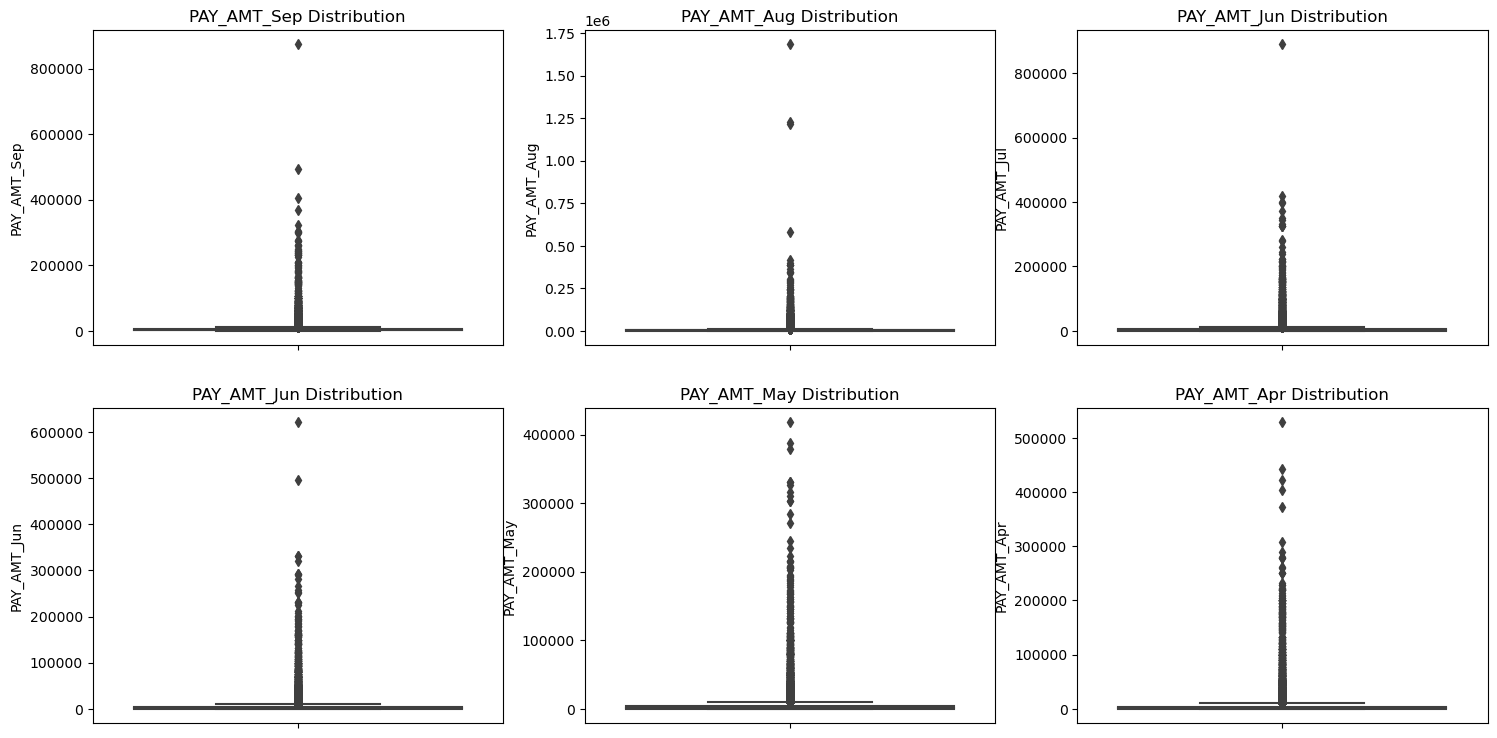

In [59]:
# PAY BOX PLOT
pay_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.boxplot(y = dftrain['PAY_AMT_Sep'], ax = axs[0,0])
axs[0,0].set_title('PAY_AMT_Sep Distribution')
sns.boxplot(y = dftrain['PAY_AMT_Aug'], ax = axs[0,1])
axs[0,1].set_title('PAY_AMT_Aug Distribution')
sns.boxplot(y = dftrain['PAY_AMT_Jul'], ax = axs[0,2])
axs[0,2].set_title('PAY_AMT_Jun Distribution')
sns.boxplot(y = dftrain['PAY_AMT_Jun'], ax = axs[1,0])
axs[1,0].set_title('PAY_AMT_Jun Distribution')
sns.boxplot(y = dftrain['PAY_AMT_May'], ax = axs[1,1])
axs[1,1].set_title('PAY_AMT_May Distribution')
sns.boxplot(y = dftrain['PAY_AMT_Apr'], ax = axs[1,2])
axs[1,2].set_title('PAY_AMT_Apr Distribution')

pay_boxplot.subplots_adjust(hspace=0.2)

Dari pembayaran nasabah tiap bulannya, masih terdapat outlier ekstrim yang mungkin akan menurunkan performa model jika data digunakan sebagai data train dalam data modeling. Sehingga lebih baik jika outlier ini dihandle dengan melakukan penghapusan atau transformasi distribusi data menjadi distribusi yang mendekati normal.

### Distrribusi User Berhasil Bayar Tagihan Tiap Bulannya

**Apakah nasabah berhasil melakukan pembayaran tagihan tiap bulannya?**

In [63]:
# Check Client payment status
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []

for index, row in dftrain.iterrows():
  if row['PAY_AMT_Sep'] >= row['BILL_AMT_Sep'] : 
    list1.append('Yes')
  else :
    list1.append('No')
datacopy['PAYMENT_Sep'] = list1

for index, row in dftrain.iterrows():
  if row['PAY_AMT_Aug'] >= row['BILL_AMT_Aug'] : 
    list2.append('Yes')
  else :
    list2.append('No')
datacopy['PAYMENT_Aug'] = list2

for index, row in dftrain.iterrows():
  if row['PAY_AMT_Jul'] >= row['BILL_AMT_Jul'] : 
    list3.append('Yes')
  else :
    list3.append('No')
datacopy['PAYMENT_Jul'] = list3

for index, row in dftrain.iterrows():
  if row['PAY_AMT_Jun'] >= row['BILL_AMT_Jun'] : 
    list4.append('Yes')
  else :
    list4.append('No')
datacopy['PAYMENT_Jun'] = list4

for index, row in dftrain.iterrows():
  if row['PAY_AMT_May'] >= row['BILL_AMT_May'] : 
    list5.append('Yes')
  else :
    list5.append('No')
datacopy['PAYMENT_May'] = list5

for index, row in dftrain.iterrows():
  if row['PAY_AMT_Apr'] >= row['BILL_AMT_Apr'] : 
    list6.append('Yes')
  else :
    list6.append('No')
datacopy['PAYMENT_Apr'] = list6

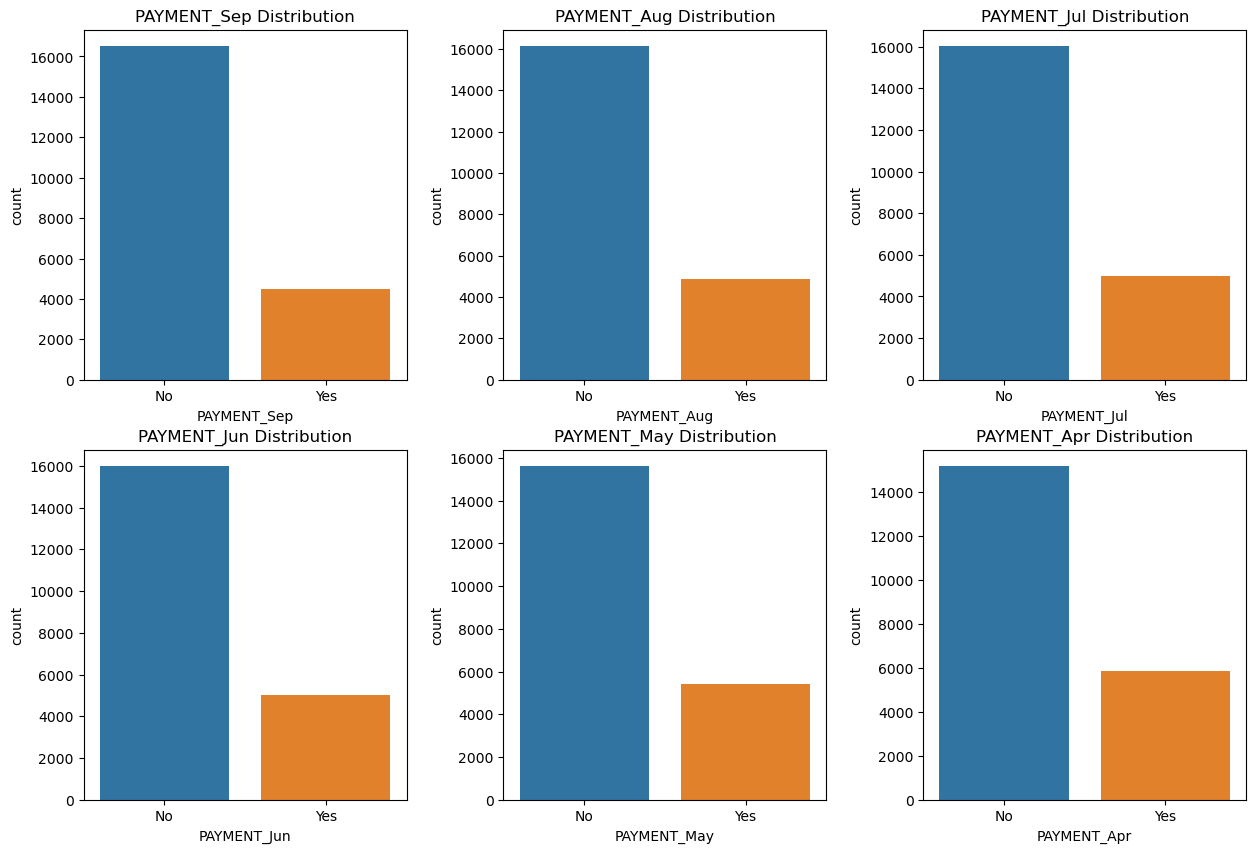

In [64]:
payment_default_plot, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 10))

PAYMENT_Sep_count = datacopy.groupby(['PAYMENT_Sep']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_Sep', y = 'count', data = PAYMENT_Sep_count, ax = axes[0,0])
axes[0,0].set_title('PAYMENT_Sep Distribution')

PAYMENT_Aug_count = datacopy.groupby(['PAYMENT_Aug']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_Aug', y = 'count', data = PAYMENT_Aug_count, ax = axes[0,1])
axes[0,1].set_title('PAYMENT_Aug Distribution')

PAYMENT_Jul_count = datacopy.groupby(['PAYMENT_Jul']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_Jul', y = 'count', data = PAYMENT_Jul_count, ax = axes[0,2])
axes[0,2].set_title('PAYMENT_Jul Distribution')

PAYMENT_Jun_count = datacopy.groupby(['PAYMENT_Jun']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_Jun', y = 'count', data = PAYMENT_Jun_count, ax = axes[1,0])
axes[1,0].set_title('PAYMENT_Jun Distribution')

PAYMENT_May_count = datacopy.groupby(['PAYMENT_May']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_May', y = 'count', data = PAYMENT_May_count, ax = axes[1,1])
axes[1,1].set_title('PAYMENT_May Distribution')

PAYMENT_Apr_count = datacopy.groupby(['PAYMENT_Apr']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAYMENT_Apr', y = 'count', data = PAYMENT_Apr_count, ax = axes[1,2])
axes[1,2].set_title('PAYMENT_Apr Distribution')

payment_default_plot.subplots_adjust(wspace=0.3, hspace = 0.2)

Nilai 'Yes' merepresentasikan user berhasil membayar tagihan nya tiap bulan

Ternyata pada tiap bulannya, lebih banyak nasabah yang tidak dapat melakukan pembayaran dengan nominal sama atau lebih dari total tagihannya. Jika hal ini terus terjadi, mungkin akan menimbulkan kerugian bagi bank.

##  Multivariate Analysis

### Korelasi Antar Feature

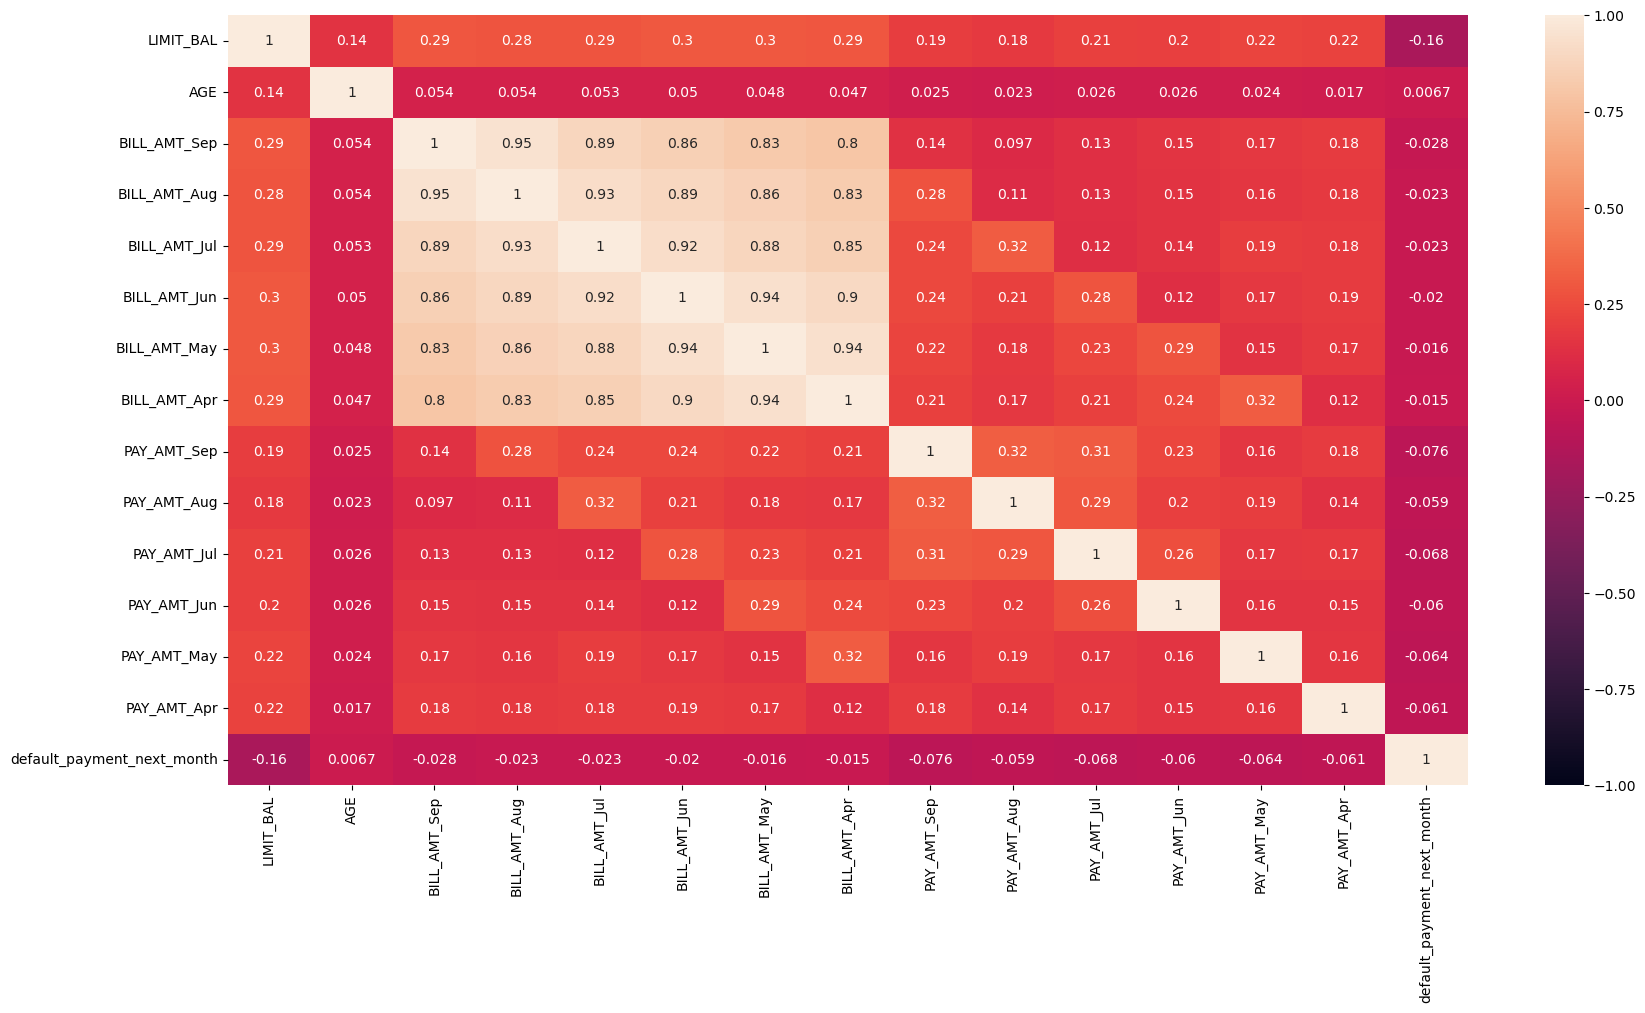

In [65]:
dat_corr = dftrain.drop(['ID', 'EDUCATION', 'MARRIAGE', 'SEX','PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun', 'PAY_May', 'PAY_Apr'], axis = 1)
corr = dat_corr.corr()

plt.figure(figsize = (20,10))
sns.heatmap(corr, vmin=-1, vmax=1,annot=True)
plt.show()

Berdasarkan segmentasi Koefisien Korelasi berikut:<br>
> 0 : Tidak ada korelasi antara dua variabel.<br>
> 0 – 0,25 : Korelasi sangat lemah.<br>
> 0,25 – 0,5 : Korelasi cukup.<br>
> 0,5 – 0,75 : Korelasi kuat.<br>
> 0,75 – 0,99 : Korelasi sangat kuat.<br>
> 1 : Korelasi hubungan sempurna positif.<br>
> -1 : Korelasi hubungan sempurna negatif.<br>

Feature BILL_AMT_sep hingga BILL_AMT_Apr berkorelasi sangat kuat antar satu sama lain. Jika data ini akan digunakan sebagai data train suatu data model, sebaiknya perlu dipastikan kembali apakah feature tagihan tiap bulannya ini redundan dan sebaiknya didrop, atau sebaiknya dipertahankan karena memiliki nilai tersendiri.

Karena nilai koef r dari data target terhadap beberapa feature < o,25, maka hubungan / korelasi linier tidak dapat digunakan, dan feature limit_bal adalah feature yang paling tinggi nilai koefisien korelasinya dengan label target.


Kemudian akan dilihat bagaimana hubungan antara tagihan nasabah tiap bulannya.

### Pair Plot Tagihan Kredit

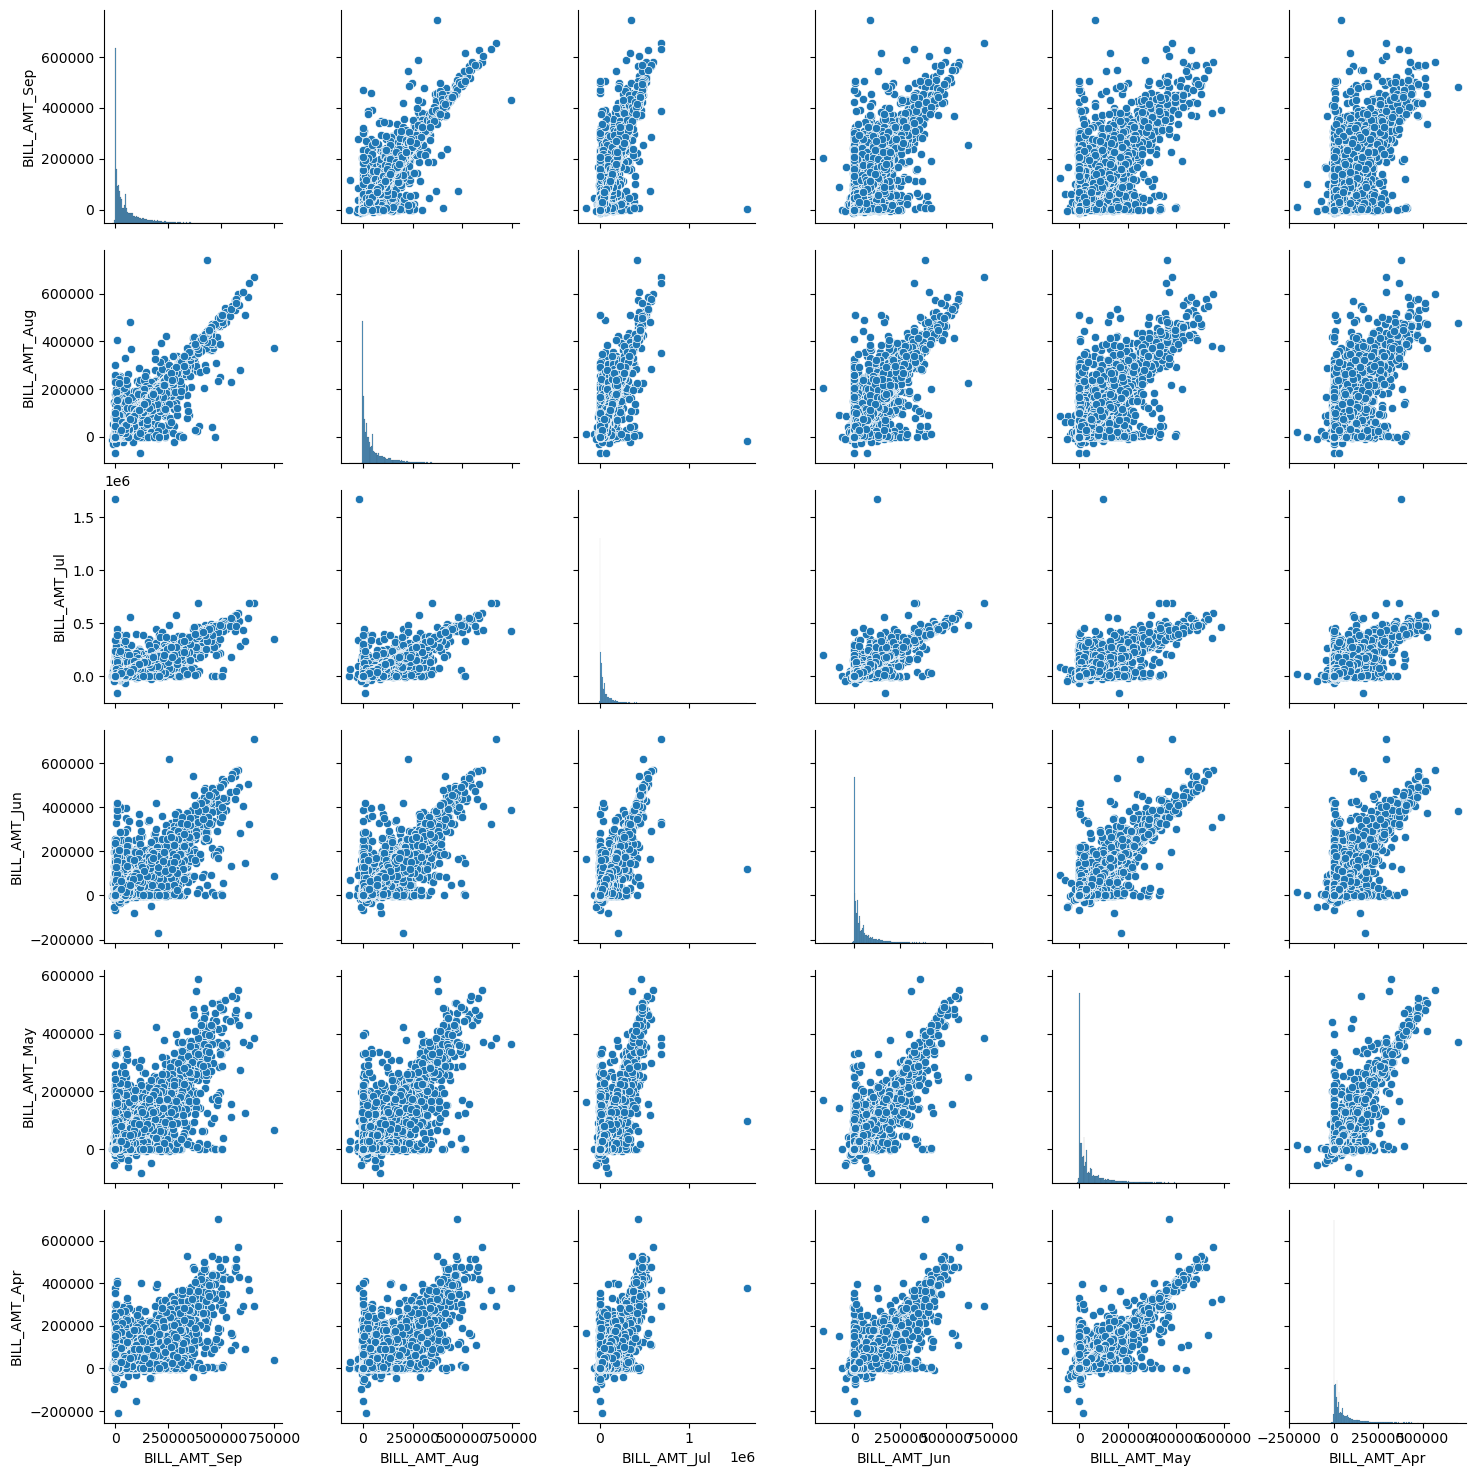

In [66]:
sns.pairplot(dftrain[['BILL_AMT_Sep', 'BILL_AMT_Aug', 'BILL_AMT_Jul', 'BILL_AMT_Jun', 'BILL_AMT_May', 'BILL_AMT_Apr']])

Dari pairplot di atas, distribusi total tagihan nasabah memang membentuk distribusi positif yang kuat. Hal ini dapat dilihat dari pola yang terbentuk antar data yang cenderung membentuk pola.

### Korelasi Payment Status dengan Background Pendidikan

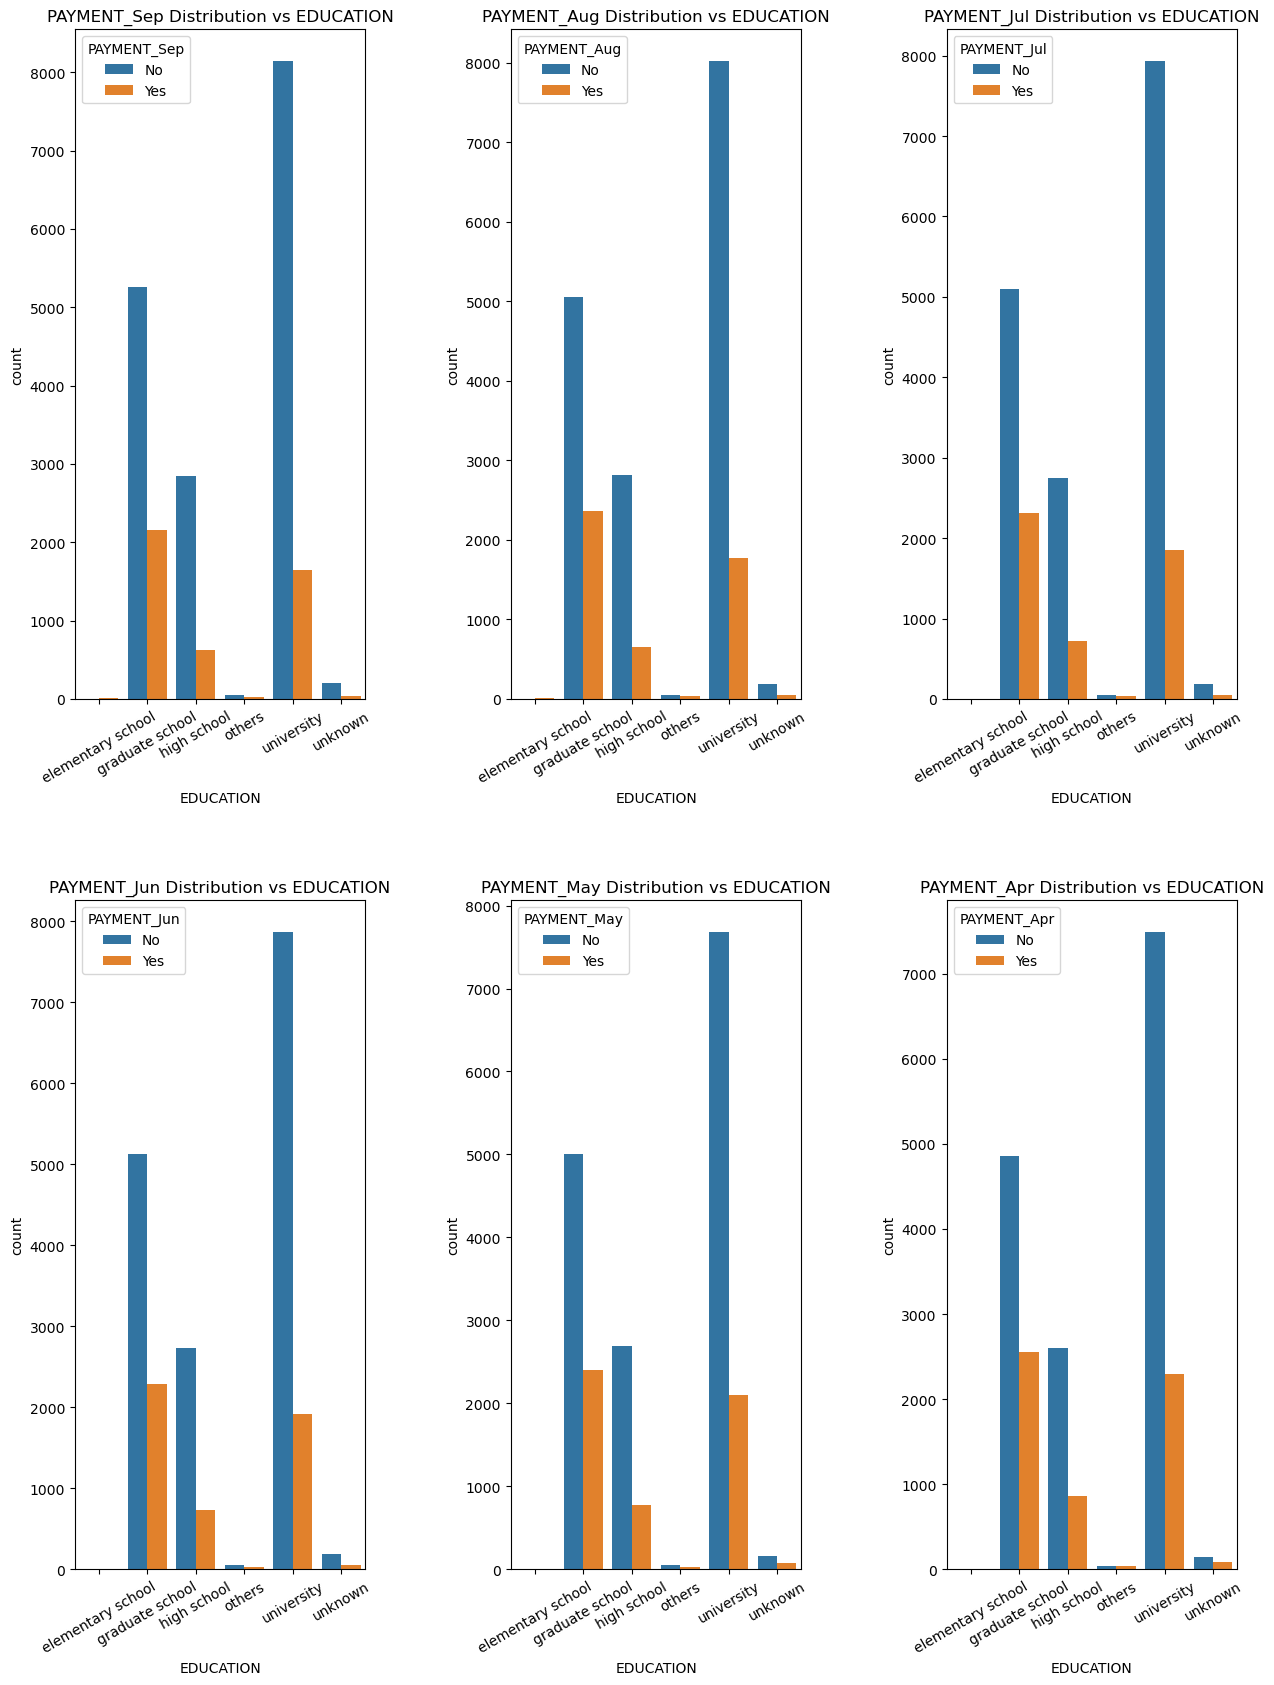

In [68]:
payment_default_plot, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 20))

PAYMENT_1_count = datacopy.groupby(['PAYMENT_Sep','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_1_count, ax = axes[0,0], hue = 'PAYMENT_Sep')
axes[0,0].set_title('PAYMENT_Sep Distribution vs EDUCATION')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=30)

PAYMENT_2_count = datacopy.groupby(['PAYMENT_Aug','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_2_count, ax = axes[0,1], hue = 'PAYMENT_Aug')
axes[0,1].set_title('PAYMENT_Aug Distribution vs EDUCATION')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=30)

PAYMENT_3_count = datacopy.groupby(['PAYMENT_Jul','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_3_count, ax = axes[0,2], hue = 'PAYMENT_Jul')
axes[0,2].set_title('PAYMENT_Jul Distribution vs EDUCATION')
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(),rotation=30)

PAYMENT_4_count = datacopy.groupby(['PAYMENT_Jun','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_4_count, ax = axes[1,0], hue = 'PAYMENT_Jun')
axes[1,0].set_title('PAYMENT_Jun Distribution vs EDUCATION')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=30)

PAYMENT_5_count = datacopy.groupby(['PAYMENT_May','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_5_count, ax = axes[1,1], hue = 'PAYMENT_May')
axes[1,1].set_title('PAYMENT_May Distribution vs EDUCATION')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation=30)

PAYMENT_6_count = datacopy.groupby(['PAYMENT_Apr','EDUCATION']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = PAYMENT_6_count, ax = axes[1,2], hue = 'PAYMENT_Apr')
axes[1,2].set_title('PAYMENT_Apr Distribution vs EDUCATION')
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(),rotation=30)

payment_default_plot.subplots_adjust(wspace=0.5, hspace = 0.3)

Nilai 'Yes' merepresentasikan user berhasil bayar tagihan per bulan nya

Feature PAYMENT_ adalah kolom pernyataan user dapat membayar tagihan pada bulan tertentu dengan jumlah lebih dari tagihan yang seharusnya.
Dari data grafik di atas, user dengan kelas university merupakan jumlah user terbanyak, tetapi banyak user tersebut yang tidak bisa membayar dengan jumlah yang seharusnya

### Korelasi Payment Status dengan Marital Status

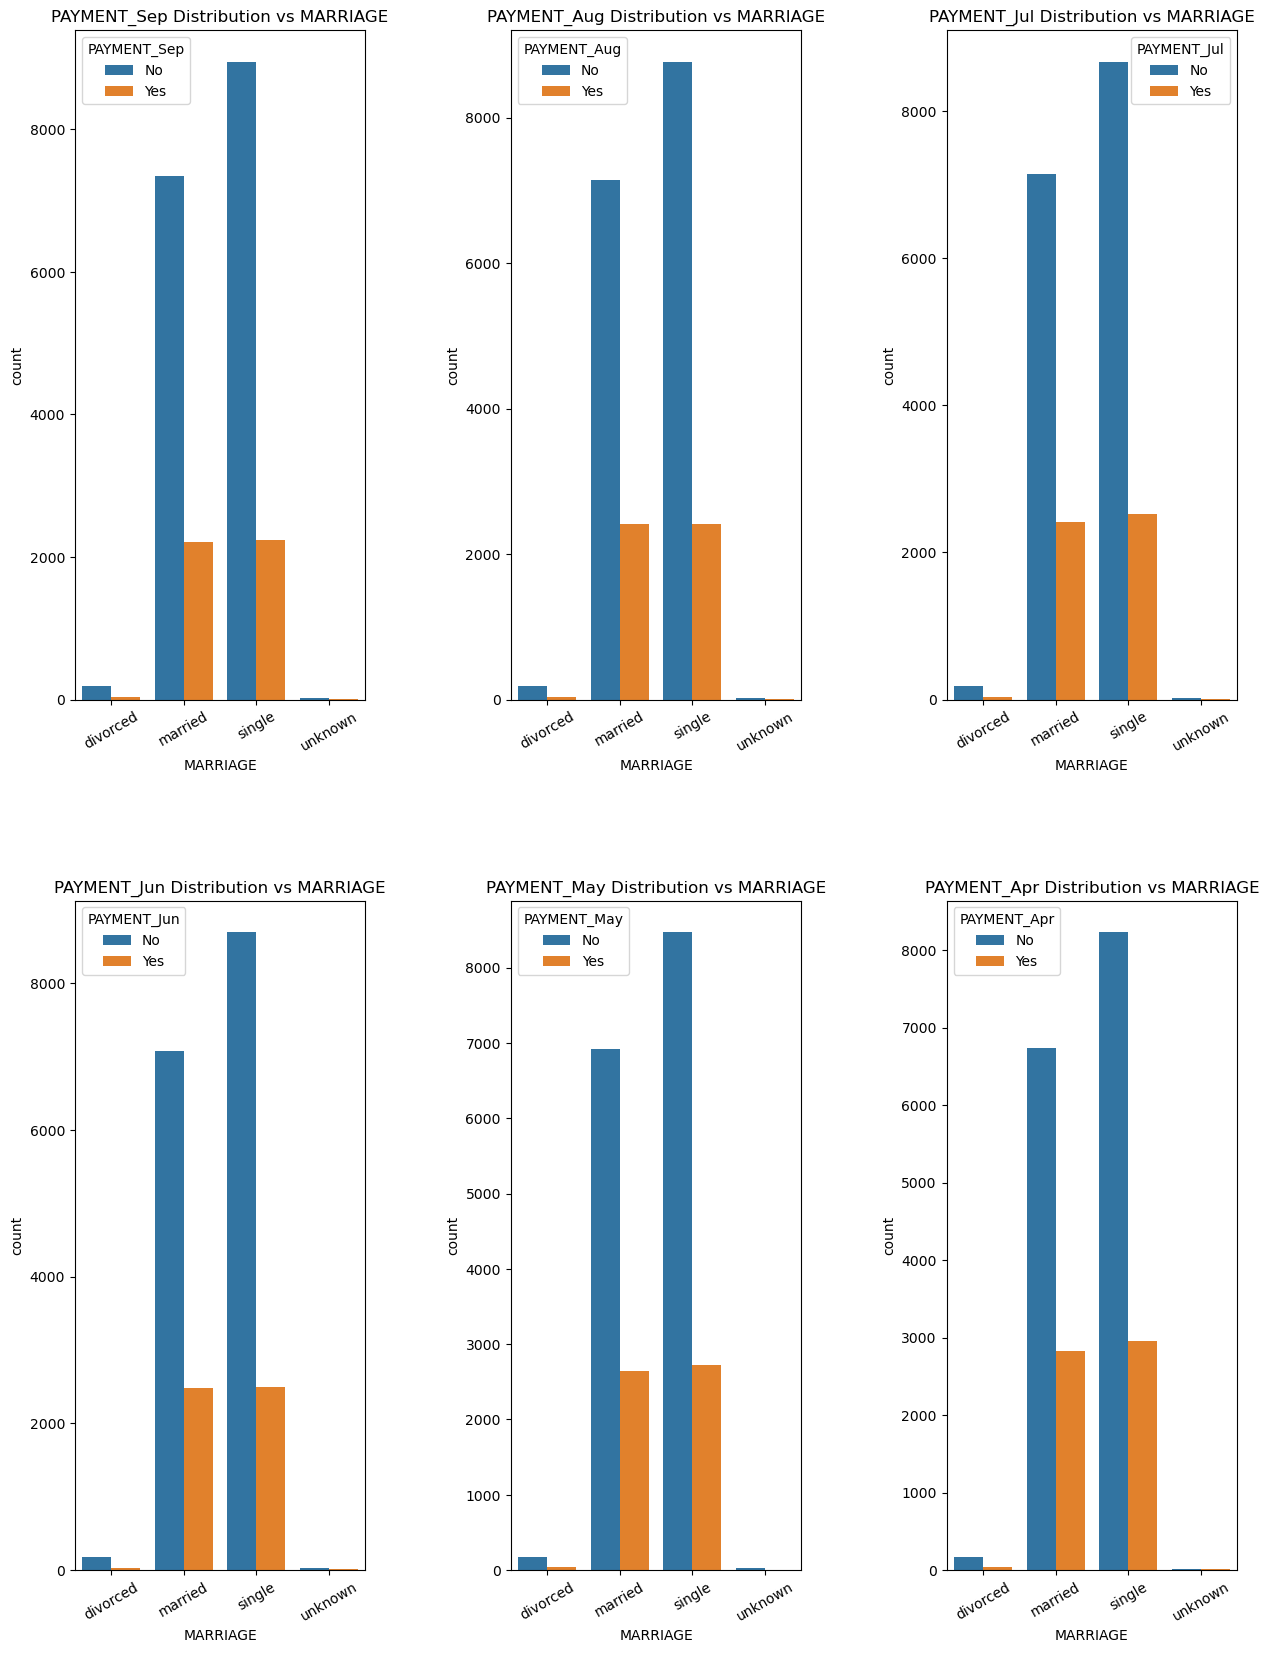

In [69]:
payment_default_plot, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 20))

PAYMENT_1_count = datacopy.groupby(['PAYMENT_Sep','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_1_count, ax = axes[0,0], hue = 'PAYMENT_Sep')
axes[0,0].set_title('PAYMENT_Sep Distribution vs MARRIAGE')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=30)

PAYMENT_2_count = datacopy.groupby(['PAYMENT_Aug','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_2_count, ax = axes[0,1], hue = 'PAYMENT_Aug')
axes[0,1].set_title('PAYMENT_Aug Distribution vs MARRIAGE')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=30)

PAYMENT_3_count = datacopy.groupby(['PAYMENT_Jul','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_3_count, ax = axes[0,2], hue = 'PAYMENT_Jul')
axes[0,2].set_title('PAYMENT_Jul Distribution vs MARRIAGE')
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(),rotation=30)

PAYMENT_4_count = datacopy.groupby(['PAYMENT_Jun','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_4_count, ax = axes[1,0], hue = 'PAYMENT_Jun')
axes[1,0].set_title('PAYMENT_Jun Distribution vs MARRIAGE')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=30)

PAYMENT_5_count = datacopy.groupby(['PAYMENT_May','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_5_count, ax = axes[1,1], hue = 'PAYMENT_May')
axes[1,1].set_title('PAYMENT_May Distribution vs MARRIAGE')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation=30)

PAYMENT_6_count = datacopy.groupby(['PAYMENT_Apr','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', data = PAYMENT_6_count, ax = axes[1,2], hue = 'PAYMENT_Apr')
axes[1,2].set_title('PAYMENT_Apr Distribution vs MARRIAGE')
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(),rotation=30)

payment_default_plot.subplots_adjust(wspace=0.5, hspace = 0.3)

Nilai 'Yes' merepresentasikan user berhasil bayar tagihan per bulan nya

Dari data grafik di atas, user dengan kelas single merupakan jumlah user terbanyak, tetapi banyak user tersebut yang tidak bisa membayar dengan jumlah yang seharusnya

### Korelasi Background Pendidikan dengan Marital Status

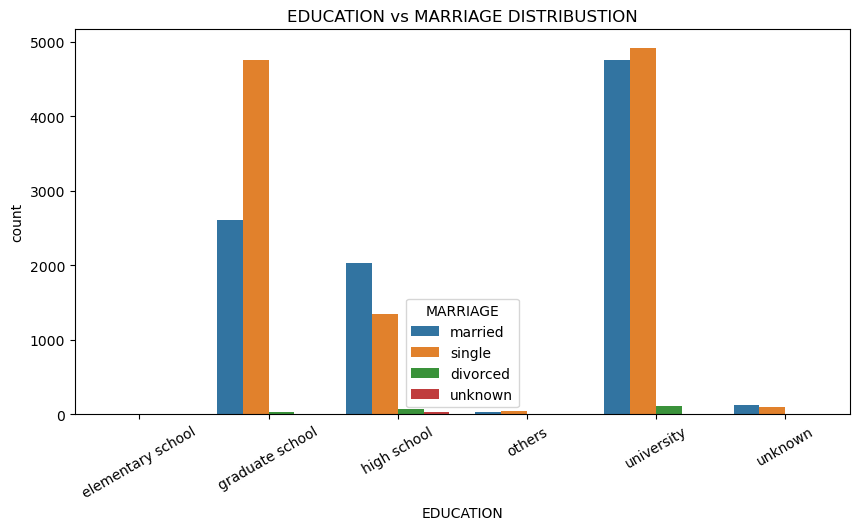

In [70]:
plt.figure(figsize=(10,5))
marriage_education_count = datacopy.groupby(['EDUCATION','MARRIAGE']).agg(count = ('ID', 'nunique')).reset_index()
ax = sns.barplot(x = 'EDUCATION', y = 'count', data = marriage_education_count, hue = 'MARRIAGE')
ax.set_title('EDUCATION vs MARRIAGE DISTRIBUSTION')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

Dari data di atas diketahui user terbanyak terdapat pada kelas pendidikan universitas dengan marital status single dimana diketahui bahwa user yang single dengan status pendidikan university banyak yang tidak bisa melakukan pembayaran sesuai dengan tagihannya

## BUSINESS INSIGHTS

Dari EDA yang telah dilakukan, dapat ditarik beberapa insight yaitu:<br>
1. Diketahui bahwa default payemnt rate dari bank berada di angka 22%. Nilai rate ini perlu dikurangi seminimum mungkin agar bank tidak mengalami kerugian yang besar, baik kerugian finansial maupun turunnya reputasi bank di mata nasabah lain maupun investor.
2. User terbanyak yang tidak bisa membayar tagihan sesuai dengan jumlahnya pada bulan tertentu merupakan user yang masih single dengan pendidikan tingkat terakhir university. Karena hal ini, perlu ada nya tinjauan khusus kedepannya untuk terkait masalah ini
3. Nasabah paling banyak berada pada segmen usia Dewasa (25-39 tahun), dan segment usia adult ini juga memiliki nasabah yang gagal bayar pada bulan Oktober paling banyak dibandingkan dengan segmen usia lainnya.

<br>
<b>BUSINESS RECOMMENDATION</b>
<br>
Dari beberapa insight tersebut, dapat diberikan rekomendasi kepada bank untuk membuat suatu model atau sistem yang dapat memprediksi apakah nasabah dapat membayar tagihan kartu kreditnya bulan depan. Dengan model ini, bank dapat memprediksi nasabah mana saja yang berpotensi untuk gagal bayar di bulan depan, sehingga bank dapat melakukan review lagi dan memberikan treatment khusus kepada nasabah tersebut seperti diberikan reminder khusus, membatasi kembali limit kartu kredit yang diberikan, atau bahkan menghentikan kartu kredit nasabah tersebut pada bulan selanjutnya.


# PRE-PROCESSING

## Rename Value Pada Feature SEX, EDUCATION & MARRIAGE

In [6]:
dftrain['SEX'] = dftrain['SEX'].replace({1:'male', 2:'female'})
dftrain['EDUCATION'] = dftrain['EDUCATION'].replace({0 : 'elementary school', 
                                                     1 : 'graduate school', #graduate school didefinisikan user dengan background pendidikan S2 (Magister)
                                                     2 : 'university', 
                                                     3 : 'high school', 
                                                     4 : 'others', #others difenisikan user dengan background pendidikan lebih tinggi dari Magister
                                                     5 : 'unknown', 
                                                     6 : 'unknown'})
dftrain['MARRIAGE']= dftrain['MARRIAGE'].replace({1 : 'married', 
                                                  2 : 'single', 
                                                  3 : 'divorced',
                                                  0 : 'unknown'})

In [186]:
dftrain.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Sep,PAY_Aug,PAY_Jul,PAY_Jun,...,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Apr,PAY_AMT_Sep,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,PAY_AMT_Apr,default_payment_next_month
0,25150,360000,female,university,single,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,female,graduate school,single,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,female,university,married,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,female,university,single,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,male,high school,married,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [187]:
dftrain['SEX'].value_counts()

female    12759
male       8241
Name: SEX, dtype: int64

In [8]:
dftrain['EDUCATION'].value_counts()

university           9789
graduate school      7415
high school          3467
unknown               234
others                 85
elementary school      10
Name: EDUCATION, dtype: int64

In [9]:
dftrain['MARRIAGE'].value_counts()

single      11184
married      9561
divorced      219
unknown        36
Name: MARRIAGE, dtype: int64

## Statistical Summary

In [7]:
cats = ['SEX','EDUCATION','MARRIAGE','PAY_Sep','PAY_Aug','PAY_Jul','PAY_Jun','PAY_May','PAY_Apr']
nums = ['LIMIT_BAL','AGE','BILL_AMT_Sep','BILL_AMT_Aug','BILL_AMT_Jul','BILL_AMT_Jun','BILL_AMT_May',
        'BILL_AMT_Apr', 'PAY_AMT_Sep','PAY_AMT_Aug','PAY_AMT_Jul','PAY_AMT_Jun','PAY_AMT_May','PAY_AMT_Apr']

In [88]:
dftrain[cats].describe()

,SEX,EDUCATION,MARRIAGE,PAY_Sep,PAY_Aug,PAY_Jul,PAY_Jun,PAY_May,PAY_Apr
count,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,2,6,4,11,11,11,10,10,10
top,female,university,single,0,0,0,0,0,0
freq,12759,9789,11184,10324,11043,11056,11542,11852,11450


Berdasarkan hasil pengamatan di atas :

Data didominasi (proporsi lebih dari 50% dari jumlah baris data) oleh perempuan untuk kolom SEX, single untuk kolom MARRIAGE, nilai 0 untuk kolom PAY_Sep, PAY_Aug, PAY_Jul, PAY_Jun, PAY_May dan PAY_Apr


In [90]:
dftrain[nums].describe()

,LIMIT_BAL,AGE,BILL_AMT_Sep,BILL_AMT_Aug,BILL_AMT_Jul,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Apr,PAY_AMT_Sep,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,PAY_AMT_Apr
count,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167214.746667,35.461619,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,128965.188482,9.206628,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,10000.000000,21.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,140000.000000,34.000000,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,800000.000000,75.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


Beberapa pengamatan Sementara:

1. Tampaknya ada issue pada nilai minimal untuk kolom BILL_AMT (bernilai negatif), hal ini kemungkinan bisa menjadi indikasi bahwa user membayar lebih pada bulan sebelumnya sehingga tagihan nya menjadi minus (karena jumlah pembayaran yang berlebih)

2. Kolom dengan tipe data numerikal, tampaknya skew ke kanan (long-right tail, mean > median)

## Handle Duplicated & Missing Data

In [189]:
# Check the missing data
if dftrain.isnull().sum().sum() == 0: print('Tidak ada missing data')
else : print(f'Terdapat data duplikat sebesar{dftrain.isnull().sum()}')

# Check the duplicated data
if dftrain.duplicated().sum() == 0: print('Tidak ada data duplikat data')
else : print(f'Terdapat data duplikat sebesar{dftrain.duplicated().sum()}')

Tidak ada missing data
Tidak ada data duplikat data


## Split Data

Sebelum melakukan data preprocessing lebih lanjut, akan dilakukan splitting data menjadi data train dan data test terlebih dahulu, karena kedua data tersebut memerlukan perlakuan yang berbeda. Splitting data ini juga dilakukan untuk menghindari kebocoran data test ke dalam data train yang dapat menyebabkan hasil yang salah dalam penilaian kinerja model dan menyebabkan model tampak lebih baik daripada yang sebenarnya.

In [8]:
ind_var = dftrain.drop('default_payment_next_month',axis = 1)
ind_var = ind_var.columns.to_list() #kolom independent variable

X = dftrain[ind_var]
y = dftrain[['default_payment_next_month']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Data train dan test dibagi dengan perbandingan 70:30

Feature train disimpan dalam X_train, dan target train disimpan dalam variable y_train. Sedangkan Feature test disimpan dalam X_test, dan target test disimpan dalam variable y_test.

## Handle Outlier

In [9]:
# Menyatukan X_train, y_train kembali
merge_train = pd.concat([X_train,y_train], axis = 1)

<AxesSubplot:xlabel='AGE'>

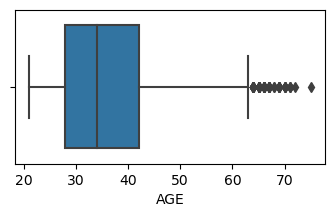

In [13]:
# Check Age Distribution
fig, ax = plt.subplots(figsize=(4, 2))
sns.boxplot(x = merge_train['AGE'], ax = ax)

<AxesSubplot:xlabel='LIMIT_BAL'>

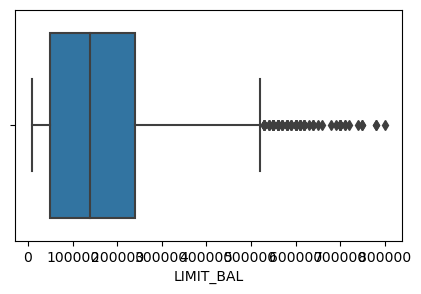

In [14]:
# Checking LIMIT_BAL outliers
fig, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(x = merge_train['LIMIT_BAL'], ax = ax)

jika dilihat dari nilai upper bound (Q3 + (1.5 X IQR)), terdapat outlier pada feature AGE, dan LIMIT_BAL.
Sehingga untuk masing2 tipe data numerikal memiliki outlier

In [10]:
# Outliers handling

print(f'Jumlah baris sebelum memfilter outlier : {len(merge_train)}')

for i in nums:
    q1 = merge_train[i].quantile(0.25)
    q3 = merge_train[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    filtered_entries = ((merge_train[i] >= low_limit) & (merge_train[i] <= high_limit))
    
merge_train = merge_train[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier : {len(merge_train)}')

Jumlah baris sebelum memfilter outlier : 14700
Jumlah baris setelah memfilter outlier : 13245


In [11]:
# memisahkan dataset train kembali
X_train = merge_train.drop('default_payment_next_month',axis = 1)
y_train = merge_train[['default_payment_next_month']]

## Feature Transform

In [12]:
#menggunakan standardization (scaler)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X[nums].columns.to_list()
for i in numerical_features:
    scaler = ss.fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

In [20]:
X_train.describe()

,LIMIT_BAL,AGE,BILL_AMT_Sep,BILL_AMT_Aug,BILL_AMT_Jul,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Apr,PAY_AMT_Sep,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,PAY_AMT_Apr
count,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04
mean,8.502909e-17,7.188579e-17,6.491179e-17,-1.072922e-17,-3.808874e-17,1.609383e-17,2.575013e-17,9.870884e-17,1.287507e-17,-1.180214e-17,3.111474e-17,-2.145844e-18,-1.180214e-17,6.544826e-17
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.207694e+00,-1.554403e+00,-9.069789e-01,-1.881413e+00,-1.516596e+00,-3.860511e+00,-1.758329e+00,-2.613412e+00,-3.451685e-01,-2.793835e-01,-3.130672e-01,-3.059016e-01,-3.175540e-01,-8.883237e-01
25%,-8.767557e-01,-7.997478e-01,-6.880194e-01,-6.917238e-01,-6.854665e-01,-6.817431e-01,-6.848557e-01,-6.850646e-01,-2.921459e-01,-2.427181e-01,-2.888627e-01,-2.918868e-01,-3.048103e-01,-8.883237e-01
50%,-2.148787e-01,-1.529007e-01,-4.046387e-01,-4.015007e-01,-3.924846e-01,-3.749521e-01,-3.647517e-01,-3.725607e-01,-1.980878e-01,-1.626147e-01,-1.935298e-01,-2.017913e-01,-1.992923e-01,-3.840434e-01
75%,5.297329e-01,6.017542e-01,2.575117e-01,2.541929e-01,2.438834e-01,2.186872e-01,2.423557e-01,2.597855e-01,1.003132e-02,-2.418523e-02,-1.956947e-02,-2.560449e-02,-2.020059e-02,4.869863e-01
max,5.162872e+00,4.267221e+00,9.601554e+00,1.030378e+01,1.109309e+01,1.234613e+01,9.221079e+00,9.933033e+00,3.593654e+01,7.136309e+01,2.916976e+01,3.949629e+01,2.603093e+01,3.612149e+00


Untuk skala pada nilai data train dan test sudah sama

## Feature Encoding

Feature SEX akan dilakukan label encoding

In [13]:
#feature encoding sex
X_train['SEX']=X_train['SEX'].replace({'male' : 0,'female' : 1})
X_test['SEX']=X_test['SEX'].replace({'male' : 0,'female' : 1})

Pada feature MARRIAGE akan dilakukan label encoding dan dikerucutkan kembali menjadi dua kategori yaitu 'in_relationship' (1) yang berisi data yang berkategori 'married', dan 'not_in_relationship'(0) yang berisi data dengan kategori 'single', 'divorce', atau 'unknown'.

In [14]:
#feature encoding marriage
X_train['MARRIAGE'] = X_train['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'unknown' : 0})
X_test['MARRIAGE'] = X_test['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'unknown' : 0})

Pada Feature Education akan dikerucutkan kembali menjadi dua ketegori yaitu 'is_educated' (1) dan 'unknown' (0), kemudian dilakukan label encoding untuk menghindari model yang terlalu kompleks dan terlalu banyak feature yang tidak relevan.

In [15]:
#feature encoding education
X_train['EDUCATION'] = X_train['EDUCATION'].replace({'graduate school' : 1, 
                                                     'university' : 1, 
                                                     'high school' : 1, 
                                                     'others' : 1, 
                                                     'elementary school' : 1, 
                                                     'unknown' : 0})
X_test['EDUCATION'] = X_test['EDUCATION'].replace({'graduate school' : 1, 
                                                     'university' : 1, 
                                                     'high school' : 1, 
                                                     'others' : 1, 
                                                     'elementary school' : 1, 
                                                     'unknown' : 0})

In [16]:
X_train['SEX'].value_counts()

1    8027
0    5218
Name: SEX, dtype: int64

In [17]:
X_test['SEX'].value_counts()

1    3846
0    2454
Name: SEX, dtype: int64

In [18]:
X_train['EDUCATION'].value_counts()

1    13088
0      157
Name: EDUCATION, dtype: int64

In [19]:
X_test['EDUCATION'].value_counts()

1    6241
0      59
Name: EDUCATION, dtype: int64

In [20]:
X_train['MARRIAGE'].value_counts()

0    7246
1    5999
Name: MARRIAGE, dtype: int64

In [21]:
X_test['MARRIAGE'].value_counts()

0    3416
1    2884
Name: MARRIAGE, dtype: int64

## Handle Class Imbalance

In [22]:
#check apakah variable target memiliki data yang imbalance?
y_train.value_counts()

default_payment_next_month
0                             10169
1                              3076
dtype: int64

In [23]:
#penentuan variable (x) independen dengan variable (y) dependen
X = X_train[[i for i in X_train.columns]]
y = y_train['default_payment_next_month']
print(X.shape)
print(y.shape)

(13245, 24)
(13245,)


In [24]:
#balancing over and under sampling through imblearn

from imblearn import under_sampling, over_sampling

X_under, y_under = under_sampling.RandomUnderSampler(random_state = 42).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(random_state = 42).fit_resample(X, y)
X_over_smote, y_over_smote = over_sampling.SMOTE(random_state = 42).fit_resample(X, y)

print(pd.Series(y).value_counts())
print(pd.Series(y_under).value_counts())
print(pd.Series(y_over).value_counts())
print(pd.Series(y_over_smote).value_counts())

0    10169
1     3076
Name: default_payment_next_month, dtype: int64
0    3076
1    3076
Name: default_payment_next_month, dtype: int64
0    10169
1    10169
Name: default_payment_next_month, dtype: int64
0    10169
1    10169
Name: default_payment_next_month, dtype: int64


In [25]:
# untuk pemilihan sampling over smote
train_smote = pd.concat([X_over_smote, y_over_smote], axis = 1)

# untuk pemilihan sampling under
train_under = pd.concat([X_under, y_under], axis = 1)

## Feature Selection

Berdasarkan pengamatan, menurut kami feature yang kurangg relevan dan dapat dihapuskan adalah Feature ID, feature ini dianggap kurang relevan dalam kasus Payment Default Credit karena tidak memiliki korelasi yang kuat dengan target variabel (default payment next month).<br><br>Featur ID dianggap kurang relevan karna tidak terlalu mempengaruhi seseorang dalam membayar hutang serta terlalu banyak memiliki unique value nya, sehingga dikhawatirkan akan mengganggu proses learning

In [26]:
#drop feature ID
df_cv = dftrain.copy() #untuk cross validation
df_cv = df_cv.drop('ID', axis=1)
train_smote = train_smote.drop('ID', axis=1)
train_under = train_under.drop('ID', axis=1)

## Feature Extraction

Membuat Feature Baru dari feature yang sudah ada pada dataset

### Total Payment Ratio

In [27]:
# Hitung total pembayaran dan total tagihan
dftrain['total_payment'] = dftrain['PAY_AMT_Sep'] + dftrain['PAY_AMT_Aug'] + dftrain['PAY_AMT_Jul'] + dftrain['PAY_AMT_Jun'] + dftrain['PAY_AMT_May'] + dftrain['PAY_AMT_Apr']
dftrain['total_bill'] = dftrain['BILL_AMT_Sep'] + dftrain['BILL_AMT_Aug'] + dftrain['BILL_AMT_Jul'] + dftrain['BILL_AMT_Jun'] + dftrain['BILL_AMT_May'] + dftrain['BILL_AMT_Apr']

# Hitung rasio total pembayaran dengan total tagihan
dftrain['total_payment_ratio'] = dftrain['total_payment'] / dftrain['total_bill']

# Cetak hasil
dftrain['total_payment_ratio'].describe()

count    2.046200e+04
mean              inf
std               NaN
min     -5.469286e+02
25%      4.221120e-02
50%      9.154397e-02
75%      6.197542e-01
max               inf
Name: total_payment_ratio, dtype: float64

In [150]:
# Hitung total pembayaran dan total tagihan
train_smote['total_payment'] = train_smote['PAY_AMT_Sep'] + train_smote['PAY_AMT_Aug'] + train_smote['PAY_AMT_Jul'] + train_smote['PAY_AMT_Jun'] + train_smote['PAY_AMT_May'] + train_smote['PAY_AMT_Apr']
train_smote['total_bill'] = train_smote['BILL_AMT_Sep'] + train_smote['BILL_AMT_Aug'] + train_smote['BILL_AMT_Jul'] + train_smote['BILL_AMT_Jun'] + train_smote['BILL_AMT_May'] + train_smote['BILL_AMT_Apr']

# Hitung rasio total pembayaran dengan total tagihan
train_smote['total_payment_ratio'] = train_smote['total_payment'] / train_smote['total_bill']

# Cetak hasil
train_smote['total_payment_ratio'].describe()

count    20338.000000
mean         0.422667
std         21.292672
min       -661.149954
25%         -0.008431
50%          0.393096
75%          0.625023
max       1902.729027
Name: total_payment_ratio, dtype: float64

Rasio total pembayaran atau total payment ratio adalah rasio antara jumlah pembayaran yang telah dilakukan oleh nasabah pada tagihan kartu kredit mereka dalam periode waktu tertentu (misalnya, 6 bulan terakhir) dibandingkan dengan total tagihan yang harus dibayarkan dalam periode waktu yang sama. Dengan kata lain, rasio ini mengukur seberapa banyak dari total tagihan yang telah dibayarkan oleh nasabah.

Rasio total pembayaran dapat memberikan indikasi tentang kemampuan nasabah dalam membayar tagihan mereka. Semakin tinggi rasio pembayaran, semakin baik kemampuan nasabah untuk membayar tagihan mereka dalam waktu yang ditentukan. Sebaliknya, jika rasio pembayaran rendah, maka ini bisa menjadi tanda bahwa nasabah mungkin mengalami kesulitan dalam membayar tagihan mereka tepat waktu.

Dalam industri kartu kredit, rasio total pembayaran ini merupakan salah satu indikator kredit yang penting untuk mengevaluasi risiko kredit nasabah. Semakin tinggi rasio pembayaran, semakin rendah risiko kredit nasabah, dan semakin rendah kemungkinan mereka akan menjadi pembayaran yang macet atau wanprestasi. Oleh karena itu, rasio total pembayaran juga dapat digunakan sebagai salah satu fitur dalam model prediksi risiko kredit atau default pada industri kartu kredit.

### Credit Utilization Ratio

In [28]:
# Hitung nilai rata-rata tagihan
dftrain['bill_amount_rata_rata'] = dftrain[['BILL_AMT_Sep', 'BILL_AMT_Aug', 'BILL_AMT_Jul','BILL_AMT_Jun','BILL_AMT_May','BILL_AMT_Apr']].mean(axis=1)

# Buat feature 'credit_utilization_ratio'
dftrain['credit_utilization_ratio'] = dftrain['bill_amount_rata_rata'] / dftrain['LIMIT_BAL'] #* 100

#Format percentage with two decimal points and percent sign
#dftrain['credit_utilization_ratio'] = dftrain['credit_utilization_ratio'].apply(lambda x: '{:.2f}%'.format(x))

# Print the result
dftrain['credit_utilization_ratio'].describe()

count    21000.000000
mean         0.373423
std          0.350590
min         -0.232590
25%          0.030655
50%          0.287751
75%          0.686787
max          5.364308
Name: credit_utilization_ratio, dtype: float64

In [65]:
# Hitung nilai rata-rata tagihan
train_smote['bill_amount_rata_rata'] = train_smote[['BILL_AMT_Sep', 'BILL_AMT_Aug', 'BILL_AMT_Jul','BILL_AMT_Jun','BILL_AMT_May','BILL_AMT_Apr']].mean(axis=1)

# Buat feature 'credit_utilization_ratio'
train_smote['credit_utilization_ratio'] = train_smote['bill_amount_rata_rata'] / train_smote['LIMIT_BAL'] #* 100

#Format percentage with two decimal points and percent sign
#dftrain['credit_utilization_ratio'] = dftrain['credit_utilization_ratio'].apply(lambda x: '{:.2f}%'.format(x))

# Print the result
train_smote['credit_utilization_ratio'].describe()

count    20338.000000
mean         0.208205
std         23.960435
min      -1414.919622
25%         -0.596455
50%          0.219501
75%          0.708314
max       2765.842004
Name: credit_utilization_ratio, dtype: float64

Rasio penggunaan kredit (credit utilization ratio) menggambarkan seberapa banyak kredit yang digunakan oleh pengguna dalam persentase dari total kredit yang tersedia. Rasio penggunaan kredit biasanya dihitung dengan membagi saldo tagihan saat ini dengan batas kredit yang tersedia. Contohnya, jika pengguna memiliki saldo tagihan sebesar 5000 dan batas kredit sebesar 10000, maka rasio penggunaan kreditnya adalah 50%.

Rasio penggunaan kredit dapat menjadi indikator penting untuk menentukan risiko pembayaran yang tidak lancar atau mengalami keterlambatan. Semakin tinggi rasio penggunaan kredit, semakin tinggi risiko pembayaran yang tidak lancar, karena pengguna mungkin kesulitan membayar tagihan bulanan yang semakin tinggi. Oleh karena itu, pada dataset "Default of Credit Card Clients", rasio penggunaan kredit sering digunakan sebagai salah satu fitur dalam memprediksi default pembayaran bulanan.

Beberapa studi telah menunjukkan bahwa rasio penggunaan kredit mempengaruhi skor kredit individu dan tingkat kepercayaan kreditur terhadap pengguna. Selain itu, rasio penggunaan kredit juga dapat memengaruhi kemampuan seseorang untuk memperoleh kredit lebih lanjut di masa depan. Oleh karena itu, rasio penggunaan kredit dapat menjadi indikator penting dalam menentukan kesehatan keuangan seseorang dan kelayakan kredit.

 rasio penggunaan kredit dapat dihitung dengan membagi "LIMIT_BAL" (batas kredit) dengan jumlah total saldo tagihan di setiap bulan. Rasio ini kemudian digunakan sebagai fitur dalam memprediksi default pembayaran bulanan. Dalam beberapa kasus, rasio penggunaan kredit juga dapat dihitung dengan menggunakan saldo tagihan pada bulan sebelumnya, atau rata-rata saldo tagihan dalam beberapa bulan terakhir, untuk memberikan gambaran yang lebih akurat tentang kebiasaan pengguna dalam menggunakan kredit.

# Modeling

## Cross Validation

In [103]:
# scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = df_cv[nums].columns.to_list()
for i in numerical_features:
    scaler = ss.fit(df_cv[[i]])
    df_cv[i] = scaler.transform(df_cv[[i]])

In [84]:
#feature encoding sex
df_cv['SEX']=df_cv['SEX'].replace({'male' : 0,'female' : 1})

#feature encoding marriage
df_cv['MARRIAGE'] = df_cv['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'unknown' : 0})

#feature encoding education
df_cv['EDUCATION'] = df_cv['EDUCATION'].replace({'graduate school' : 1, 
                                                     'university' : 1, 
                                                     'high school' : 1, 
                                                     'others' : 1, 
                                                     'elementary school' : 1, 
                                                     'unknown' : 0})

#cek
df_cv.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Sep,PAY_Aug,PAY_Jul,PAY_Jun,PAY_May,...,BILL_AMT_Jun,BILL_AMT_May,BILL_AMT_Apr,PAY_AMT_Sep,PAY_AMT_Aug,PAY_AMT_Jul,PAY_AMT_Jun,PAY_AMT_May,PAY_AMT_Apr,default_payment_next_month
0,360000,1,1,0,25,-1,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,240000,1,1,0,46,2,2,-2,-1,0,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,320000,1,1,1,41,0,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,50000,1,1,0,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,80000,0,1,1,52,-1,0,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [87]:
for i in ['PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun', 'PAY_May', 'PAY_Apr']:
  df_cv[i] = df_cv[i].astype('int64')

In [80]:
#def function model cross_validation
X = df_cv.drop(columns='default_payment_next_month', axis=1)
y = df_cv['default_payment_next_month']

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def cross_validation(model):
    score_accuracy = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
    print('accuracy (crossval train): '+ str(score_accuracy['train_score'].mean()))
    print('accuracy (crossval test): '+ str(score_accuracy['test_score'].mean()))
        
    score_precision = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    print('precision (crossval train): '+ str(score_precision['train_score'].mean()))
    print('precision (crossval test): '+ str(score_precision['test_score'].mean()))
    
    score_recall = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score_recall['train_score'].mean()))
    print('recall (crossval test): '+ str(score_recall['test_score'].mean()))
    
    score_auc = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score_auc['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score_auc['test_score'].mean()))
    
    score_f1 = cross_validate(model, X, y, cv=5, scoring='f1', return_train_score=True)
    print('f1 (crossval train): '+ str(score_f1['train_score'].mean()))
    print('f1 (crossval test): '+ str(score_f1['test_score'].mean()))

### Logistic Regression

In [124]:
#run model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
cross_validation(lr)

accuracy (crossval train): 0.810702380952381
accuracy (crossval test): 0.8101904761904762
precision (crossval train): 0.7091115443863337
precision (crossval test): 0.7094852763207726
recall (crossval train): 0.24451022604951564
recall (crossval test): 0.24090419806243274
roc_auc (crossval train): 0.7308117639470587
roc_auc (crossval test): 0.7291033938525562
f1 (crossval train): 0.36358094419734055
f1 (crossval test): 0.35956368094308677


### Decision Tree

In [118]:
#run model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
cross_validation(dt)

accuracy (crossval train): 0.9993095238095238
accuracy (crossval test): 0.7233333333333334
precision (crossval train): 0.9998920960266771
precision (crossval test): 0.38475536256701637
recall (crossval train): 0.9969860064585576
recall (crossval test): 0.4178686759956943
roc_auc (crossval train): 0.999998556154009
roc_auc (crossval test): 0.6142854698250174
f1 (crossval train): 0.9984368245757717
f1 (crossval test): 0.40057508067988296


### XGBoost

In [89]:
#run model
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
cross_validation(xg)

accuracy (crossval train): nan
accuracy (crossval test): nan
precision (crossval train): nan
precision (crossval test): nan
recall (crossval train): nan
recall (crossval test): nan
roc_auc (crossval train): nan
roc_auc (crossval test): nan
f1 (crossval train): nan
f1 (crossval test): nan


### Random Forest

In [121]:
#run model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
cross_validation(rf)

accuracy (crossval train): 0.9992738095238096
accuracy (crossval test): 0.8153333333333332
precision (crossval train): 0.998600094297411
precision (crossval test): 0.6414605401190865
recall (crossval train): 0.9981162540365984
recall (crossval test): 0.3743810548977395
roc_auc (crossval train): 0.9999921555148006
roc_auc (crossval test): 0.7611163965289777
f1 (crossval train): 0.9983579461671654
f1 (crossval test): 0.4726586747168501


## Random Split

In [30]:
#drop 'ID' pada data test
X_test = X_test.drop('ID', axis=1)

In [31]:
#memisahkan data target pada dataset train
X_train_under = train_under.drop('default_payment_next_month',axis = 1)
y_train_under = train_under[['default_payment_next_month']]

In [32]:
# def function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

def random_split(model) :
    y_pred = model.predict(X_test) #predict label
    y_pred_train = model.predict(X_train_under) #predict label
    y_pred_proba = model.predict_proba(X_test) #predict probability
    y_pred_proba_train = model.predict_proba(X_train_under) #predict probability
    
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_train_under, y_pred_train))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_pred))
    
    print('Precision (Train Set): %.2f' % precision_score(y_train_under, y_pred_train))
    print('Precision (Test Set): %.2f' % precision_score(y_test, y_pred))
    
    print('Recall (Train Set): %.2f' % recall_score(y_train_under, y_pred_train))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (train-proba): %.2f' % roc_auc_score(y_train_under, y_pred_proba_train[:,1]))
    print('AUC (test-proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    
    print('F1-Score (Train Set): %.2f' % f1_score(y_train_under, y_pred_train))
    print('F1-Score (Test Set): %.2f' % f1_score(y_test, y_pred))

### Logistic Regression

#### Model

In [212]:
#run model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_under, y_train_under)
random_split(lr)

Accuracy (Train Set): 0.67
Accuracy (Test Set): 0.69
Precision (Train Set): 0.67
Precision (Test Set): 0.39
Recall (Train Set): 0.67
Recall (Test Set): 0.63
AUC (train-proba): 0.73
AUC (test-proba): 0.72
F1-Score (Train Set): 0.67
F1-Score (Test Set): 0.48


#### Hyperparameter Tuning

In [213]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
model = RandomizedSearchCV(lr, hyperparameters, scoring='recall', cv=5)
model.fit(X_train_under, y_train_under)
random_split(model)

Accuracy (Train Set): 0.67
Accuracy (Test Set): 0.70
Precision (Train Set): 0.67
Precision (Test Set): 0.39
Recall (Train Set): 0.67
Recall (Test Set): 0.63
AUC (train-proba): 0.73
AUC (test-proba): 0.72
F1-Score (Train Set): 0.67
F1-Score (Test Set): 0.48


#### Analyzing Curve C

param value: 0.0001; train: 0.6160598179453837; test: 0.5809659090909091
param value: 0.010199999999999999; train: 0.6537711313394018; test: 0.6143465909090909
param value: 0.0203; train: 0.6566970091027308; test: 0.6178977272727273
param value: 0.0304; train: 0.6573472041612484; test: 0.6221590909090909
param value: 0.0405; train: 0.6583224967490247; test: 0.6235795454545454
param value: 0.0506; train: 0.6609232769830949; test: 0.625
param value: 0.060700000000000004; train: 0.6609232769830949; test: 0.6257102272727273
param value: 0.0708; train: 0.6612483745123537; test: 0.6257102272727273
param value: 0.0809; train: 0.66222366710013; test: 0.6264204545454546
param value: 0.091; train: 0.6635240572171651; test: 0.6271306818181818
param value: 0.1011; train: 0.6635240572171651; test: 0.6278409090909091
param value: 0.1112; train: 0.6635240572171651; test: 0.6278409090909091
param value: 0.1213; train: 0.6638491547464239; test: 0.6278409090909091
param value: 0.1314; train: 0.664499349

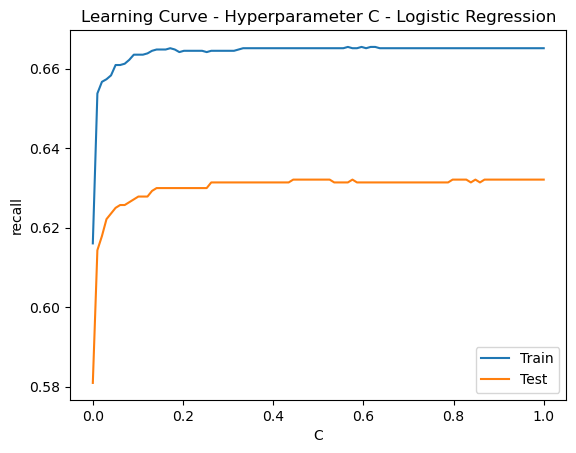

In [214]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train_under, y_train_under)

        # eval on train
        y_pred_train = model.predict(X_train_under)
        train_recall = recall_score(y_train_under, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param_values = [float(x) for x in np.linspace(0.0001, 1, 100)]
draw_learning_curve(param_values)

Best range nilai C = 0.25 - 1

##### Model After Learning Curve

In [215]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.25, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
model = RandomizedSearchCV(lr, hyperparameters, scoring='recall', cv=5)
model.fit(X_train_under, y_train_under)
random_split(model)

Accuracy (Train Set): 0.67
Accuracy (Test Set): 0.70
Precision (Train Set): 0.68
Precision (Test Set): 0.39
Recall (Train Set): 0.67
Recall (Test Set): 0.63
AUC (train-proba): 0.73
AUC (test-proba): 0.72
F1-Score (Train Set): 0.67
F1-Score (Test Set): 0.48


### Decision Tree

#### Model

In [216]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_under, y_train_under) 
random_split(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.61
Precision (Train Set): 1.00
Precision (Test Set): 0.32
Recall (Train Set): 1.00
Recall (Test Set): 0.62
AUC (train-proba): 1.00
AUC (test-proba): 0.62
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.42


#### Hyperparameter Tuning

In [217]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model.fit(X_train_under, y_train_under)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
random_split(model)

Accuracy (Train Set): 0.78
Accuracy (Test Set): 0.67
Precision (Train Set): 0.80
Precision (Test Set): 0.36
Recall (Train Set): 0.76
Recall (Test Set): 0.61
AUC (train-proba): 0.87
AUC (test-proba): 0.71
F1-Score (Train Set): 0.78
F1-Score (Test Set): 0.45


#### Analyzing Curve

##### Max_Depth

param value: 1; train: 0.5237321196358907; test: 0.5241477272727273
param value: 2; train: 0.596553966189857; test: 0.578125
param value: 3; train: 0.596553966189857; test: 0.578125
param value: 4; train: 0.5763979193758128; test: 0.5461647727272727
param value: 5; train: 0.5890767230169051; test: 0.5525568181818182
param value: 6; train: 0.6690507152145644; test: 0.6264204545454546
param value: 7; train: 0.6547464239271782; test: 0.5965909090909091
param value: 8; train: 0.6697009102730819; test: 0.5795454545454546
param value: 9; train: 0.7067620286085826; test: 0.5987215909090909
param value: 10; train: 0.72074122236671; test: 0.5916193181818182
param value: 11; train: 0.7526007802340702; test: 0.6022727272727273
param value: 12; train: 0.793888166449935; test: 0.6100852272727273
param value: 13; train: 0.811443433029909; test: 0.5930397727272727
param value: 14; train: 0.8498049414824448; test: 0.6136363636363636
param value: 15; train: 0.8540312093628089; test: 0.6129261363636364


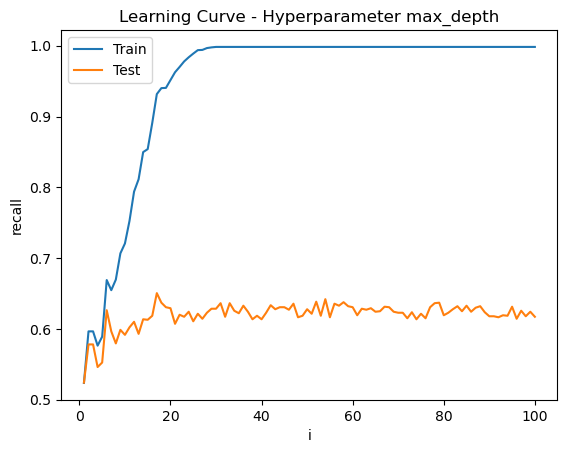

In [218]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train_under, y_train_under)

        # eval on train
        y_pred_train = model.predict(X_train_under)
        train_recall = recall_score(y_train_under, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter max_depth')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(1,100,100)]
draw_learning_curve(param_values)

Dari max_depth, nilai kedalaman ideal berada pada sekitaran range 1 hingga 20

##### Min_Samples_Leaf

param value: 1; train: 0.9983745123537061; test: 0.6136363636363636
param value: 2; train: 0.9118985695708712; test: 0.5838068181818182
param value: 3; train: 0.9164499349804941; test: 0.6136363636363636
param value: 4; train: 0.8582574772431729; test: 0.5965909090909091
param value: 5; train: 0.8563068920676203; test: 0.6044034090909091
param value: 6; train: 0.8198959687906372; test: 0.5838068181818182
param value: 7; train: 0.8309492847854356; test: 0.5951704545454546
param value: 8; train: 0.7912873862158648; test: 0.5965909090909091
param value: 9; train: 0.8036410923276983; test: 0.6221590909090909
param value: 10; train: 0.7776332899869961; test: 0.6150568181818182
param value: 11; train: 0.7802340702210663; test: 0.6164772727272727
param value: 12; train: 0.7708062418725617; test: 0.6136363636363636
param value: 13; train: 0.7831599479843954; test: 0.6384943181818182
param value: 14; train: 0.7903120936280884; test: 0.6505681818181818
param value: 15; train: 0.7987646293888166;

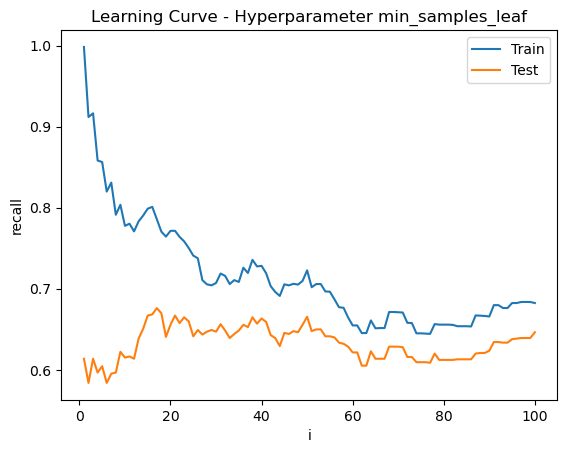

In [219]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(X_train_under, y_train_under)

        # eval on train
        y_pred_train = model.predict(X_train_under)
        train_recall = recall_score(y_train_under, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter min_samples_leaf')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(1,100,100)]
draw_learning_curve(param_values)

Dari min_samples_leaf, nilai kedalaman ideal berada pada sekitaran range 10 hingga 100

##### Model With Parameter After Learning Curve

In [220]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1,20,100)] # Maximum number of levels in tree
min_samples_leaf = [int(x) for x in np.linspace(10,101,100)] # Minimum number of samples required at each leaf node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_leaf=min_samples_leaf,
                       )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model.fit(X_train_under, y_train_under)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
random_split(model)

Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.70
Precision (Train Set): 0.76
Precision (Test Set): 0.39
Recall (Train Set): 0.70
Recall (Test Set): 0.63
AUC (train-proba): 0.82
AUC (test-proba): 0.75
F1-Score (Train Set): 0.73
F1-Score (Test Set): 0.49


### XGBoost

#### Model

In [221]:
X_xgb = X_train_under.copy()
y_xgb = y_train_under.copy()

for i in ['PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun', 'PAY_May', 'PAY_Apr']:
  X_xgb[i] = X_xgb[i].astype('int64')

In [222]:
X_xgb_test = X_test.copy()
y_xgb_test = y_test.copy()

for i in ['PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun', 'PAY_May', 'PAY_Apr']:
  X_xgb_test[i] = X_xgb_test[i].astype('int64')

In [223]:
# def function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

def xgb(model) :
    y_pred = model.predict(X_xgb_test) #predict label
    y_pred_train = model.predict(X_xgb) #predict label
    y_pred_proba = model.predict_proba(X_xgb_test) #predict probability
    y_pred_proba_train = model.predict_proba(X_xgb) #predict probability
    
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_xgb, y_pred_train))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_xgb_test, y_pred))
    
    print('Precision (Train Set): %.2f' % precision_score(y_xgb, y_pred_train))
    print('Precision (Test Set): %.2f' % precision_score(y_xgb_test, y_pred))
    
    print('Recall (Train Set): %.2f' % recall_score(y_xgb, y_pred_train))
    print('Recall (Test Set): %.2f' % recall_score(y_xgb_test, y_pred))
    
    print('AUC (train-proba): %.2f' % roc_auc_score(y_xgb, y_pred_proba_train[:,1]))
    print('AUC (test-proba): %.2f' % roc_auc_score(y_xgb_test, y_pred_proba[:,1]))
    
    print('F1-Score (Train Set): %.2f' % f1_score(y_xgb, y_pred_train))
    print('F1-Score (Test Set): %.2f' % f1_score(y_xgb_test, y_pred))

In [224]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_xgb, y_xgb)
xgb(xg)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.70
Precision (Train Set): 0.96
Precision (Test Set): 0.40
Recall (Train Set): 0.95
Recall (Test Set): 0.64
AUC (train-proba): 0.99
AUC (test-proba): 0.75
F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.49


#### Hyperparameter Tuning

In [225]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(0, 1, num = 10)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 10, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_xgb, y_xgb)

# Predict & Evaluation
xgb(xg_tuned)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.67
Precision (Train Set): 0.99
Precision (Test Set): 0.37
Recall (Train Set): 1.00
Recall (Test Set): 0.65
AUC (train-proba): 1.00
AUC (test-proba): 0.72
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.47


#### Analyzing Curver Max_Depth

param value: 1; train: 0.6206111833550065; test: 0.5923295454545454
param value: 1; train: 0.6206111833550065; test: 0.5923295454545454
param value: 2; train: 0.6781534460338101; test: 0.6413352272727273
param value: 3; train: 0.7298439531859557; test: 0.6413352272727273
param value: 4; train: 0.8016905071521456; test: 0.6427556818181818
param value: 5; train: 0.8871911573472041; test: 0.6519886363636364
param value: 6; train: 0.9463589076723017; test: 0.640625
param value: 7; train: 0.9668400520156046; test: 0.640625
param value: 8; train: 0.9944733420026007; test: 0.6427556818181818
param value: 9; train: 0.9980494148244473; test: 0.6328125
param value: 10; train: 0.9993498049414824; test: 0.6420454545454546


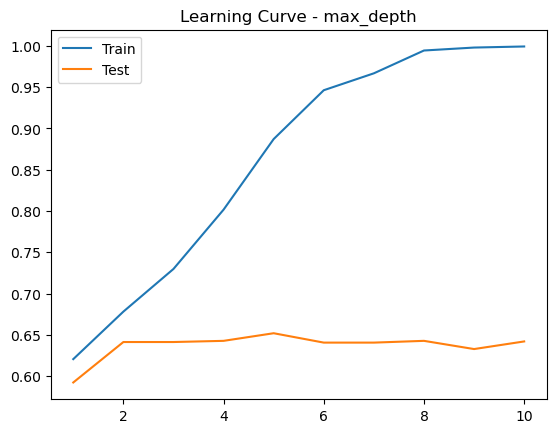

In [226]:
param_values = [int(x) for x in np.linspace(1, 10, 11)] 

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=c, random_state=42)
    model.fit(X_xgb, y_xgb)
       
    # eval on train
    y_pred_train = model.predict(X_xgb)
    train_recall = recall_score(y_xgb, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(X_xgb_test)
    test_recall = recall_score(y_xgb_test, y_pred)
    test_scores.append(test_recall)


    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.title('Learning Curve - max_depth')
plt.legend()
plt.show()

parameter max_depth terbaik = 1 - 3

##### Model After Learning Curve

In [227]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(1, 4, num = 10)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 10, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_xgb, y_xgb)

# Predict & Evaluation
xgb(xg_tuned)

Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.70
Precision (Train Set): 0.87
Precision (Test Set): 0.39
Recall (Train Set): 0.86
Recall (Test Set): 0.64
AUC (train-proba): 0.94
AUC (test-proba): 0.74
F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.48


### Random Forest

#### Model

In [228]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_under, y_train_under)
random_split(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.74
Precision (Train Set): 1.00
Precision (Test Set): 0.44
Recall (Train Set): 1.00
Recall (Test Set): 0.63
AUC (train-proba): 1.00
AUC (test-proba): 0.75
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.52


#### Hyperparameter Tuning

In [229]:
# list hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train_under, y_train_under)
random_split(rs)

Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.71
Precision (Train Set): 0.81
Precision (Test Set): 0.41
Recall (Train Set): 0.75
Recall (Test Set): 0.64
AUC (train-proba): 0.88
AUC (test-proba): 0.75
F1-Score (Train Set): 0.78
F1-Score (Test Set): 0.50


#### Analyzing Curve Min_Samples_Leaf

param value: 2; train: 0.7503250975292588; test: 0.6207386363636364
param value: 3; train: 0.7513003901170351; test: 0.6257102272727273
param value: 4; train: 0.7513003901170351; test: 0.6257102272727273
param value: 5; train: 0.7630039011703511; test: 0.6285511363636364
param value: 7; train: 0.7503250975292588; test: 0.6313920454545454
param value: 8; train: 0.7574772431729518; test: 0.6285511363636364
param value: 9; train: 0.7483745123537061; test: 0.6242897727272727
param value: 11; train: 0.758777633289987; test: 0.6392045454545454
param value: 12; train: 0.7548764629388817; test: 0.6313920454545454
param value: 13; train: 0.7591027308192457; test: 0.6278409090909091
param value: 14; train: 0.7467490247074122; test: 0.6186079545454546
param value: 16; train: 0.7581274382314694; test: 0.6257102272727273
param value: 17; train: 0.7594278283485045; test: 0.6285511363636364
param value: 18; train: 0.7581274382314694; test: 0.6285511363636364
param value: 20; train: 0.7604031209362809

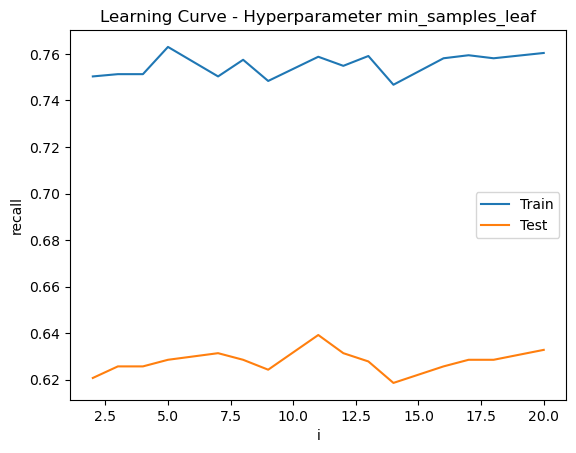

In [230]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
        model.fit(X_train_under, y_train_under)

        # eval on train
        y_pred_train = model.predict(X_train_under)
        train_recall = recall_score(y_train_under, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter min_samples_leaf')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(2,20,15)]
draw_learning_curve(param_values)

## Evaluation

Dari hasil modeling, evaluasi score yang paling bagus adalah random forest, selanjutnya kita coba optimasi dengan meninjau kembali pre processing

### Feature Importance

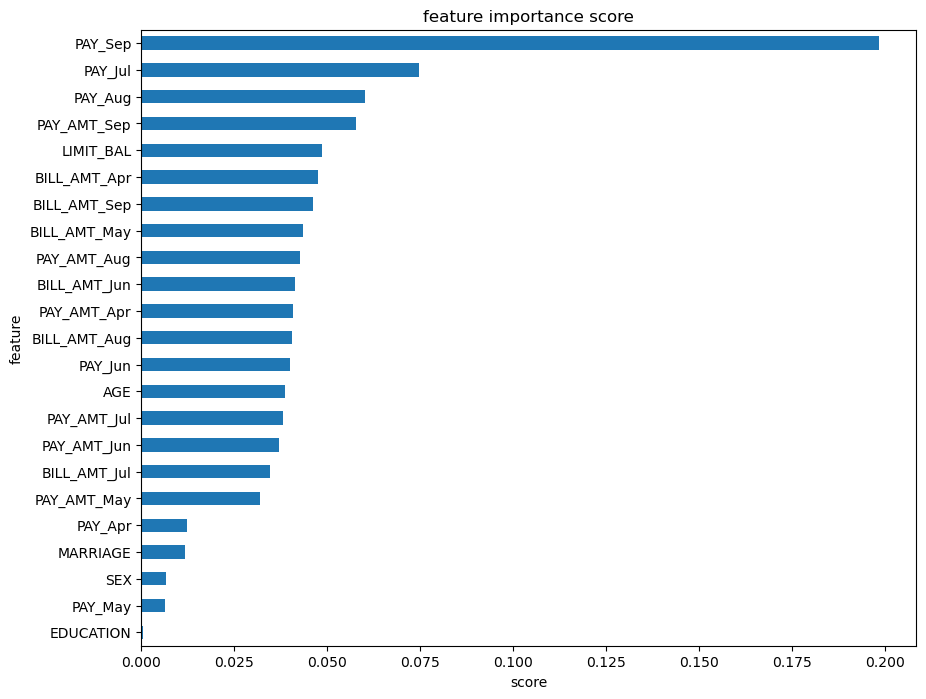

In [37]:
rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train_under, y_train_under)

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train_under.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
show_feature_importance(rs.best_estimator_)

Karena feature Education tidak memiliki informasi yang penting (walaupun ada, hanya sedikit), maka dari itu kita drop

Pay Status pada bulan September, Agustus dan Juli memiliki informasi penting terhadap model

In [52]:
#drop feature pada X_train 
X_train_fi = X_train_under.copy()
X_train_fi = X_train_fi.drop(['EDUCATION'], axis=1)

#drop feature pada X_train
X_test_fi = X_test.copy()
X_test_fi = X_test_fi.drop(['EDUCATION'], axis=1)

In [53]:
y_train_fi = train_under[['default_payment_next_month']]

#### Model After Future Importance

In [54]:
# def function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

def fi(model) :
    y_pred = model.predict(X_test_fi) #predict label
    y_pred_train = model.predict(X_train_fi) #predict label
    y_pred_proba = model.predict_proba(X_test_fi) #predict probability
    y_pred_proba_train = model.predict_proba(X_train_fi) #predict probability
    
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_train_fi, y_pred_train))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_pred))
    
    print('Precision (Train Set): %.2f' % precision_score(y_train_fi, y_pred_train))
    print('Precision (Test Set): %.2f' % precision_score(y_test, y_pred))
    
    print('Recall (Train Set): %.2f' % recall_score(y_train_fi, y_pred_train))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (train-proba): %.2f' % roc_auc_score(y_train_fi, y_pred_proba_train[:,1]))
    print('AUC (test-proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    
    print('F1-Score (Train Set): %.2f' % f1_score(y_train_fi, y_pred_train))
    print('F1-Score (Test Set): %.2f' % f1_score(y_test, y_pred))

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_fi, y_train_fi)
fi(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.73
Precision (Train Set): 1.00
Precision (Test Set): 0.43
Recall (Train Set): 1.00
Recall (Test Set): 0.63
AUC (train-proba): 1.00
AUC (test-proba): 0.76
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.51


#### Hyperparameter Tuning After Future Importance

In [55]:
# list hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train_fi, y_train_fi)
fi(rs)

Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.72
Precision (Train Set): 0.80
Precision (Test Set): 0.42
Recall (Train Set): 0.76
Recall (Test Set): 0.65
AUC (train-proba): 0.88
AUC (test-proba): 0.75
F1-Score (Train Set): 0.78
F1-Score (Test Set): 0.51


param value: 2; train: 0.9879713914174252; test: 0.6321022727272727
param value: 3; train: 0.9554616384915474; test: 0.6313920454545454
param value: 4; train: 0.9171001300390117; test: 0.6257102272727273
param value: 5; train: 0.8767880364109233; test: 0.6335227272727273
param value: 7; train: 0.8104681404421327; test: 0.625
param value: 8; train: 0.7886866059817945; test: 0.6306818181818182
param value: 9; train: 0.7750325097529259; test: 0.6321022727272727
param value: 11; train: 0.7395968790637191; test: 0.6292613636363636
param value: 12; train: 0.7376462938881665; test: 0.6292613636363636
param value: 13; train: 0.7252925877763329; test: 0.6342329545454546
param value: 14; train: 0.7210663198959688; test: 0.6306818181818182
param value: 16; train: 0.7100130039011704; test: 0.6377840909090909
param value: 17; train: 0.6999349804941483; test: 0.6242897727272727
param value: 18; train: 0.6953836150845254; test: 0.6321022727272727
param value: 20; train: 0.688556566970091; test: 0.627

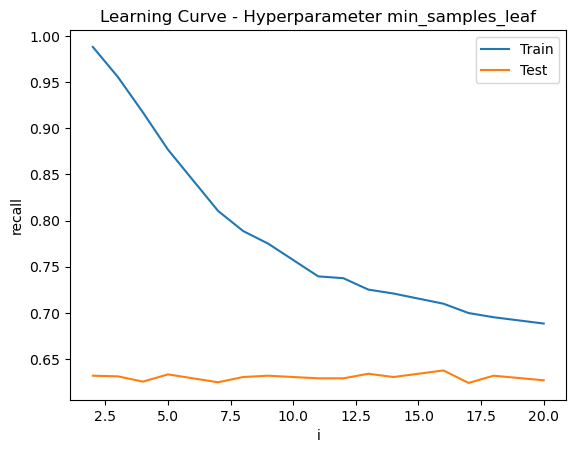

In [44]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(n_estimators=75, min_samples_leaf=i)
        model.fit(X_train_fi, y_train_fi)

        # eval on train
        y_pred_train = model.predict(X_train_fi)
        train_recall = recall_score(y_train_fi, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test_fi)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter min_samples_leaf')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(2,20,15)]
draw_learning_curve(param_values)

Best range min_samples_leaf antara 12.5 - 20

#### Model Future Importance After Learning Curve

In [56]:
# list hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(12.5, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train_fi, y_train_fi)
fi(rs)

Accuracy (Train Set): 0.76
Accuracy (Test Set): 0.74
Precision (Train Set): 0.79
Precision (Test Set): 0.44
Recall (Train Set): 0.72
Recall (Test Set): 0.64
AUC (train-proba): 0.86
AUC (test-proba): 0.76
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.52


### Test Menggunakan Handling Sampling Over SMOTE

In [46]:
#memisahkan data target pada dataset train
X_train_smote = train_smote.drop('default_payment_next_month',axis = 1)
y_train_smote = train_smote[['default_payment_next_month']]

#drop feature pada X_train 
X_train_fi_smote = X_train_smote.copy()
X_train_fi_smote = X_train_fi_smote.drop(['EDUCATION'], axis=1)

#drop feature pada X_train
X_test_fi_smote = X_test.copy()
X_test_fi_smote = X_test_fi_smote.drop(['EDUCATION'], axis=1)

#rename feature target
y_train_fi_smote = train_smote[['default_payment_next_month']]

In [47]:
# def function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

def fi(model) :
    y_pred = model.predict(X_test_fi_smote) #predict label
    y_pred_train = model.predict(X_train_fi_smote) #predict label
    y_pred_proba = model.predict_proba(X_test_fi_smote) #predict probability
    y_pred_proba_train = model.predict_proba(X_train_fi_smote) #predict probability
    
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_train_fi_smote, y_pred_train))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_pred))
    
    print('Precision (Train Set): %.2f' % precision_score(y_train_fi_smote, y_pred_train))
    print('Precision (Test Set): %.2f' % precision_score(y_test, y_pred))
    
    print('Recall (Train Set): %.2f' % recall_score(y_train_fi_smote, y_pred_train))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (train-proba): %.2f' % roc_auc_score(y_train_fi_smote, y_pred_proba_train[:,1]))
    print('AUC (test-proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    
    print('F1-Score (Train Set): %.2f' % f1_score(y_train_fi_smote, y_pred_train))
    print('F1-Score (Test Set): %.2f' % f1_score(y_test, y_pred))

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_fi, y_train_fi)
fi(rf)

Accuracy (Train Set): 0.80
Accuracy (Test Set): 0.73
Precision (Train Set): 0.83
Precision (Test Set): 0.43
Recall (Train Set): 0.75
Recall (Test Set): 0.63
AUC (train-proba): 0.88
AUC (test-proba): 0.76
F1-Score (Train Set): 0.79
F1-Score (Test Set): 0.51


In [49]:
# list hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train_fi, y_train_fi)
fi(rs)

Accuracy (Train Set): 0.70
Accuracy (Test Set): 0.72
Precision (Train Set): 0.73
Precision (Test Set): 0.42
Recall (Train Set): 0.63
Recall (Test Set): 0.65
AUC (train-proba): 0.77
AUC (test-proba): 0.75
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.51


param value: 2; train: 0.9889466840052016; test: 0.6292613636363636
param value: 3; train: 0.9538361508452535; test: 0.6186079545454546
param value: 4; train: 0.9154746423927178; test: 0.6321022727272727
param value: 5; train: 0.8693107932379714; test: 0.6242897727272727
param value: 7; train: 0.8166449934980494; test: 0.6377840909090909
param value: 8; train: 0.7899869960988296; test: 0.6313920454545454
param value: 9; train: 0.7786085825747724; test: 0.6264204545454546
param value: 11; train: 0.7457737321196359; test: 0.6321022727272727
param value: 12; train: 0.7288686605981795; test: 0.6321022727272727
param value: 13; train: 0.7314694408322496; test: 0.640625
param value: 14; train: 0.7168400520156046; test: 0.6228693181818182
param value: 16; train: 0.6996098829648895; test: 0.6264204545454546
param value: 17; train: 0.701885565669701; test: 0.6349431818181818
param value: 18; train: 0.6989596879063719; test: 0.6342329545454546
param value: 20; train: 0.6940832249674902; test: 0.

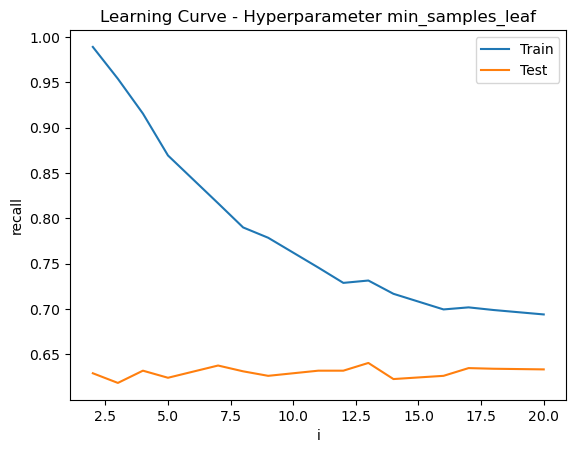

In [50]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(n_estimators=75, min_samples_leaf=i)
        model.fit(X_train_fi, y_train_fi)

        # eval on train
        y_pred_train = model.predict(X_train_fi)
        train_recall = recall_score(y_train_fi, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test_fi)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter min_samples_leaf')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(2,20,15)]
draw_learning_curve(param_values)

In [51]:
# list hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(12.5, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train_fi, y_train_fi)
fi(rs)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.74
Precision (Train Set): 0.73
Precision (Test Set): 0.44
Recall (Train Set): 0.61
Recall (Test Set): 0.64
AUC (train-proba): 0.76
AUC (test-proba): 0.76
F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.52


Hasil kurang lebih sama dengan menggunakan under sampling

### Confusion Matrix

In [57]:
# print result
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rs.predict(X_test_fi)
# membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# membuat DataFrame dari confusion matrix
df_cm = pd.DataFrame(cm, index=['actual No', 'actual Yes'], columns=['predict No', 'predict Yes'])

# mencetak DataFrame
print(df_cm)

            predict No  predict Yes
actual No         3729         1163
actual Yes         506          902


### Result

In [58]:
actual_default = len(dftrain[dftrain['default_payment_next_month']==1])
all_customer = len(dftrain)
default_rate = round(actual_default/all_customer,4)
default_rate_after = round((actual_default - cm[1][1])/all_customer,4)
print('default rate awal', default_rate*100,'%')
print('default rate setelah menerapkan model', default_rate_after*100,'%')

default rate awal 22.12 %
default rate setelah menerapkan model 17.82 %


Setelah disimulasikan menggunakan model machine learning, default paymet ratio berkurang menjadi 17.82%